# <font color='green'>Lending Club Case Study

- Lending Club is an online peer-to-peer lending platform that connects borrowers seeking personal loans with investors looking to fund those loans. Borrowers apply for loans through the platform, and investors can choose which loans to fund based on their risk preferences and expected returns.

## <font color='green'>Importing Required Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_loan = pd.read_csv('loan.csv')

C:\Users\Tejas300089.VITELYAI\AppData\Local\Temp\ipykernel_35164\456152031.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan = pd.read_csv('loan.csv')


In [13]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [17]:
# shape of data before dropping the columns
df_loan.shape

(39717, 57)

## Data Cleaning

In [15]:
#finding total null values in each column and store them in null_value variable.
null_value = df_loan.isnull().sum()
#printing columns that have more than 0 null values or missing values
null_value[null_value > 0]

emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

In [16]:
# shape of data after dropping null columns
df_loan.shape

(39717, 57)

#### Checking total number of null values present in each column 

In [9]:
df_loan.isna().sum()[df_loan.isna().sum() > 0] 

emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

In [19]:
#Removing columns which has more than 10000 null values in it.
df_loan.drop(null_value[null_value > 10000].index, axis=1, inplace=True)

In [20]:
#Rechecking shape
df_loan.shape

(39717, 53)

In [21]:
#checking how many unique values are there in each column
df_loan.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

#### From this we can see that the column named "tax_liens, delinq_amnt, chargeoff_within_12_mths, acc_now_delinq application_type, policy_code, collections_12_mths_ex_med, initial_list_status, pymnt_plan" has only 1 unique value. So we can remove those column as it won't give us useful information.

In [23]:
#storing unique values of each column in unique_column
unique_column = df_loan.nunique()

In [24]:
#storing only the columns that has unique value equals to 1 in single_unique
single_unique = unique_column[unique_column.values == 1]
#showing index of single unique value
single_unique.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [25]:
#dropping all the columns that have unique value equals to 1
df_loan.drop(columns = list(single_unique.index), inplace=True)
#checking shape
df_loan.shape

(39717, 44)

In [26]:
#once again analysing the unique value in descending order
df_loan.nunique().sort_values(ascending=False).head()

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
dtype: int64

#### From above we can say that, column named "id, url and member_id" are having same number of unique value that of number of rows in dataframe. So, in this case we can remove two columns i.e. url and member_id as we required only one primary key.

In [27]:
#dropping url and member_id
df_loan.drop(['url', 'member_id'], axis=1, inplace=True)
#checking shape
df_loan.shape

(39717, 42)

In [28]:
#analysing null values once again in each column
df_loan.isnull().sum().head(12)

id                    0
loan_amnt             0
funded_amnt           0
funded_amnt_inv       0
term                  0
int_rate              0
installment           0
grade                 0
sub_grade             0
emp_title          2459
emp_length         1075
home_ownership        0
dtype: int64

As we can see that null value and unique value of <b>emp_title</b> is more, so we can drop this column as it will disturb our analysis.

In [30]:
#dropping emp_title column
df_loan.drop(['emp_title'], axis=1, inplace=True)
#checking shape
df_loan.shape

(39717, 41)

In [31]:
#to check the null values greater than 0
null_values = df_loan.isnull().sum()
null_values[null_values > 0]

emp_length              1075
title                     11
revol_util                50
last_pymnt_d              71
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

We can remove the null value rows of the above column so that it won't effect our analysis.

In [32]:
#dropping the rows of above null values
df_loan.dropna(subset=['emp_length', 'title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'], inplace=True)
df_loan.shape

(37825, 41)

In [33]:
#analysing the columns
df_loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

From above we can say that there are some <b>customer behaviour variables</b> that are not availbale at the time of loan application, and thus they cannot be used as prediction of credit approval, therefore we can remove those variables from our dataset.

In [34]:
#dropping customer behaviour columnS
df_loan.drop(['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc','open_acc', 'pub_rec','revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'], axis=1, inplace=True)
#checking shape
df_loan.shape

(37825, 21)

In [35]:
#analyzing unique value of loan_status column
df_loan["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

From above, we can say that there are 3 distinct value but the loan status <b>"Current"</b> doesn't give any information for approving or rejecting loan application. So, we can drop the rows having value <b>"Current"</b>.

In [36]:
#dropping rows having value current
df_loan = df_loan[df_loan["loan_status"] != 'Current']
#checking shape
df_loan.shape

(36727, 21)

In [37]:
#analyzing unique value of term column
df_loan["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

We can see that there is a empty space at the start of the term values. So let's remove it.

In [38]:
#Stripping empty space in values in term
df_loan["term"] = df_loan.term.str.strip()
df_loan.term.unique()

array(['36 months', '60 months'], dtype=object)

# Data Manipulation 

## Data type Conversion

In [39]:
#analyzing data type in each column
df_loan.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

<b>issue_d</b> are having date values but here it's showing "object", so we can convert the data type "object" to "date" 

In [41]:
#converting to date type
df_loan['issue_d'] = pd.to_datetime(df_loan.issue_d, format='%b-%y')

In [42]:
#analysing int_rate and revol_util column
df_loan["int_rate"]

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39562    10.28%
39573    10.59%
39623    12.49%
39666    11.22%
39680    11.86%
Name: int_rate, Length: 36727, dtype: object

Here we can observe that the column contains "%" because of which it is showing datatype as Object.
So we can remove "%" and convert it into float datatype.

In [44]:
#stripping '%' value
df_loan['int_rate'] = df_loan.int_rate.str.strip('%').astype(float)

In [45]:
#let's see whether it is converted or not for proper analysis
df_loan.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
pub_rec_bankruptcies           float64
dtype: object

# Outlier Treatment

Text(0, 0.5, 'Annual Income')

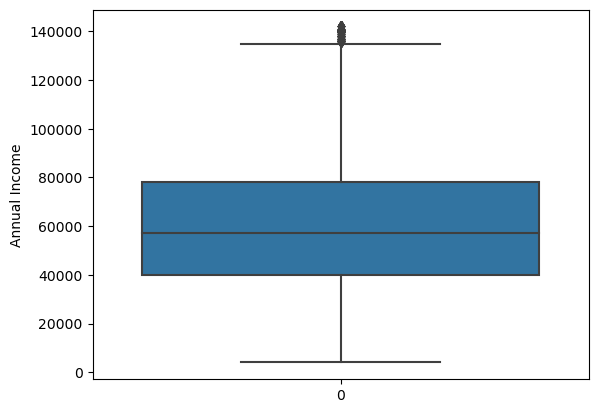

In [61]:
#analyse outliers in annual_inc using boxplot
sns.boxplot(df_loan['annual_inc'])
plt.ylabel('Annual Income')

In [48]:
#describing annual_inc column to get more insite
df_loan.annual_inc.describe()

count    3.672700e+04
mean     6.947194e+04
std      6.406963e+04
min      4.000000e+03
25%      4.120000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [49]:
df_loan.annual_inc.quantile([0.90, 0.95, 0.97,0.98, 0.99])

0.90    117000.0
0.95    142000.0
0.97    166000.0
0.98    189000.0
0.99    235000.0
Name: annual_inc, dtype: float64

Clearly from above plot we can say that their is a presence of outlier.
* So let us remove the values after 95 percentile

In [50]:
#removing the values after 95 percentile
percent_95 = df_loan['annual_inc'].quantile(0.95)
df_loan = df_loan[df_loan.annual_inc <= percent_95]

Text(0, 0.5, 'Annual Income')

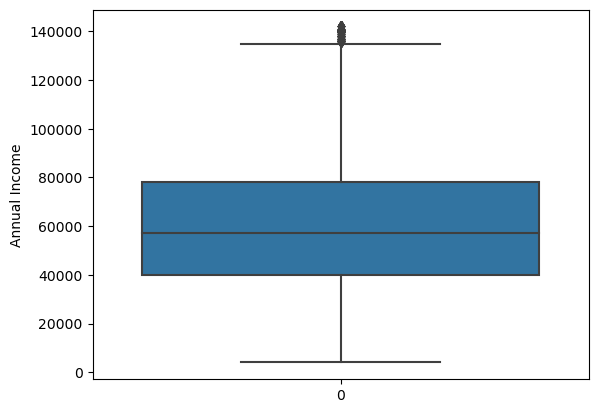

In [60]:
sns.boxplot(df_loan['annual_inc'])
plt.ylabel('Annual Income')

Now. there is no such outliers in "annual_inc". So, we can proceed further.

## Derived Variables

Let's create new columns from date type columns

In [52]:
#creating new column 'month' and 'year' from 'issue_d' column
df_loan["issue_d_year"] = df_loan.issue_d.dt.year
df_loan['issue_d_month'] = df_loan.issue_d.dt.strftime('%b')

Let's see the approved loan amount percentage with the help of 'funded_amnt_inv' and 'loan_amnt' by creating new column

In [53]:
df_loan['approved_loan_amt_percent'] = round(df_loan.funded_amnt_inv*100/df_loan.loan_amnt,2)

Binning the data to analyse more efficiently.

In [54]:
# categorise loan amounts into buckets which will help in analysis further.
df_loan['loan_amnt_bin'] = pd.cut(df_loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
df_loan['annual_inc_bin'] = pd.cut(df_loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
df_loan['int_rate_bin'] = pd.cut(df_loan['int_rate'], [5, 10, 15, 20], labels=['5-10', '10-15', '15-20'])

# categorise dti into buckets for bivariate analysis.
df_loan['dti_bin'] = pd.cut(df_loan['dti'], [0, 5, 10, 15, 20, 25, 30], labels=['0-5', '05-10', '10-15', '15-20', '20-25','25-30'])

In [56]:
df_loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,addr_state,dti,pub_rec_bankruptcies,issue_d_year,issue_d_month,approved_loan_amt_percent,loan_amnt_bin,annual_inc_bin,int_rate_bin,dti_bin
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,...,AZ,27.65,0.0,2011,Dec,99.5,0-7000,20000-40000,10-15,25-30
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,...,GA,1.00,0.0,2011,Dec,100.0,0-7000,20000-40000,15-20,0-5
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,...,IL,8.72,0.0,2011,Dec,100.0,0-7000,0-20000,15-20,05-10
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,...,CA,20.00,0.0,2011,Dec,100.0,7000-14000,40000-60000,10-15,15-20
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,...,AZ,11.20,0.0,2011,Dec,100.0,0-7000,20000-40000,5-10,10-15


In [57]:
# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
df_loan['loan_status_count'] = df_loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
df_loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,dti,pub_rec_bankruptcies,issue_d_year,issue_d_month,approved_loan_amt_percent,loan_amnt_bin,annual_inc_bin,int_rate_bin,dti_bin,loan_status_count
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,...,27.65,0.0,2011,Dec,99.5,0-7000,20000-40000,10-15,25-30,0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,...,1.00,0.0,2011,Dec,100.0,0-7000,20000-40000,15-20,0-5,1
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,...,8.72,0.0,2011,Dec,100.0,0-7000,0-20000,15-20,05-10,0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,...,20.00,0.0,2011,Dec,100.0,7000-14000,40000-60000,10-15,15-20,0
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,...,11.20,0.0,2011,Dec,100.0,0-7000,20000-40000,5-10,10-15,0


### As we are done with cleaning the data, derived new variables for our analysis and removed the outliers. Now, we can start analysing the data.

## Univariate Analysis

### Quantitative Variables

Let's see the distribution of loan amount , funded amount and funded amount by investor using distribution plot.

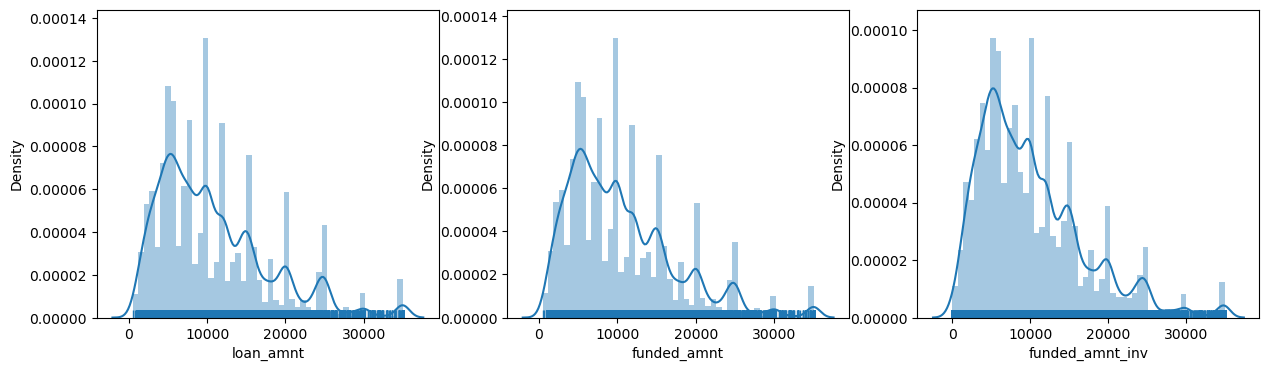

In [58]:
#Setting up the figure size of the plot
plt.figure(figsize=(15,4))

#Setting subplot index
plt.subplot(1,3,1)

#Distribution plot
sns.distplot(df_loan['loan_amnt'],rug = True)

#Setting subplot index
plt.subplot(1,3,2)

#Distribution plot
sns.distplot(df_loan['funded_amnt'],rug = True)

#Setting subplot index
plt.subplot(1,3,3)

#Distribution plot
sns.distplot(df_loan['funded_amnt_inv'],rug = True)
plt.show()

##### Observations
- From above, we can say that amount distribution looks very similar. So we can use <b>loan_amnt</b> for our further analysis.

#### Analyzing Approved Loan Amount percentage

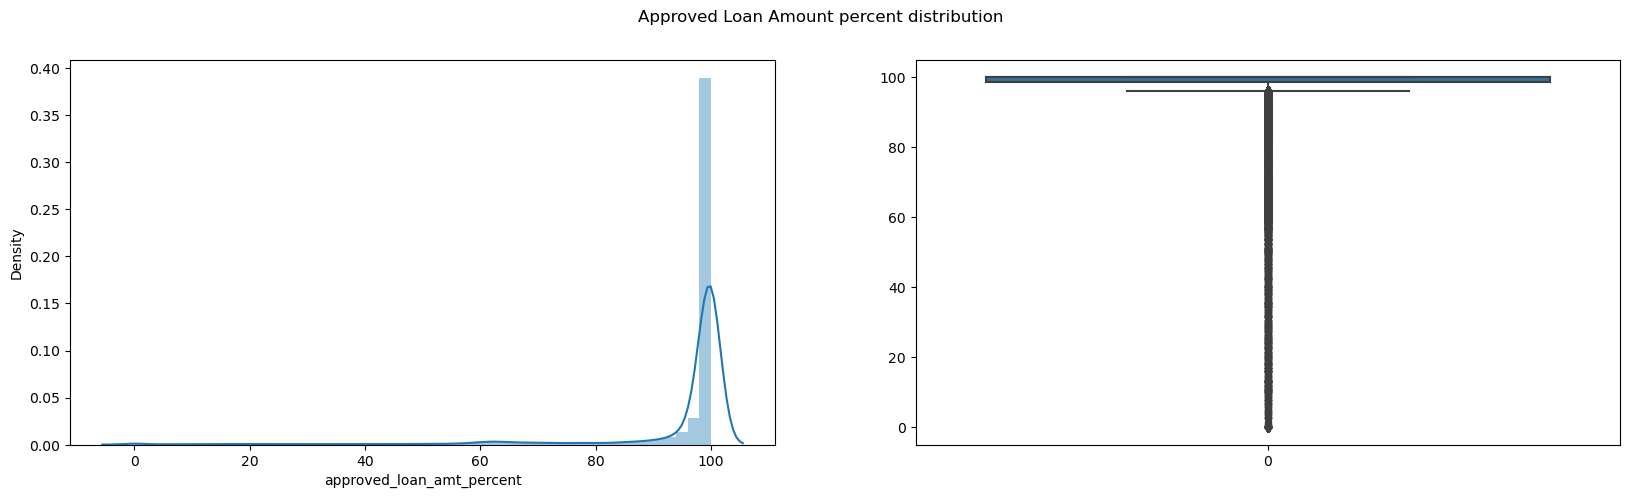

In [67]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a = df_loan.approved_loan_amt_percent)
plt.subplot(1,2,2)
sns.boxplot(df_loan.approved_loan_amt_percent)
plt.suptitle('Approved Loan Amount percent distribution')
plt.show()

##### Observations
- 80% of Borrowers got 100% loan amount from investors.

<b> Analyzing Loan Amount </b>.

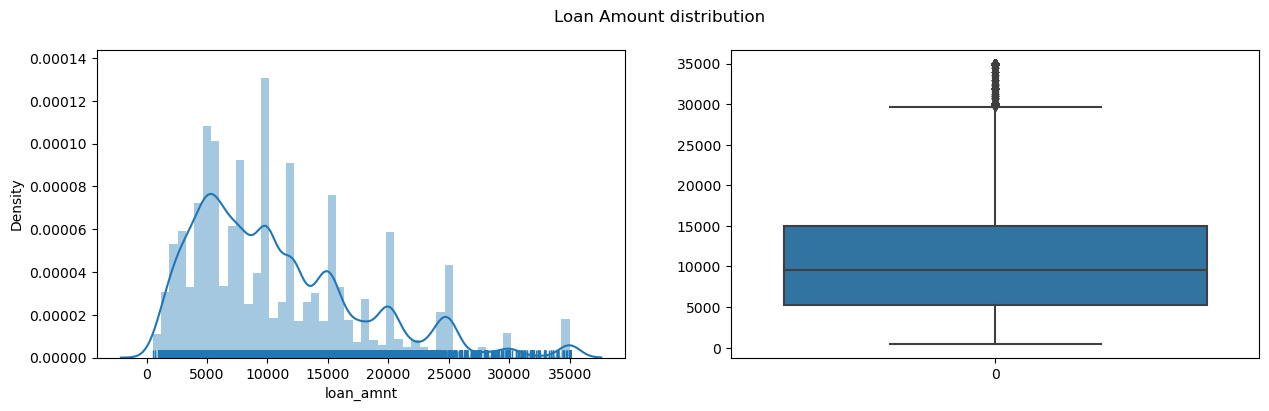

In [65]:
#Setting up the figure size of the plot
plt.figure(figsize=(15,4))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.distplot(a=df_loan.loan_amnt, rug=True)

#Setting subplot index
plt.subplot(1,2,2)

#Box plot
sns.boxplot(df_loan.loan_amnt)

#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

##### Observations
- From loan amount data, we can say that most of them have taken their loan between 5000 and 15000.

<b> Analyzing Interest Rate </b>

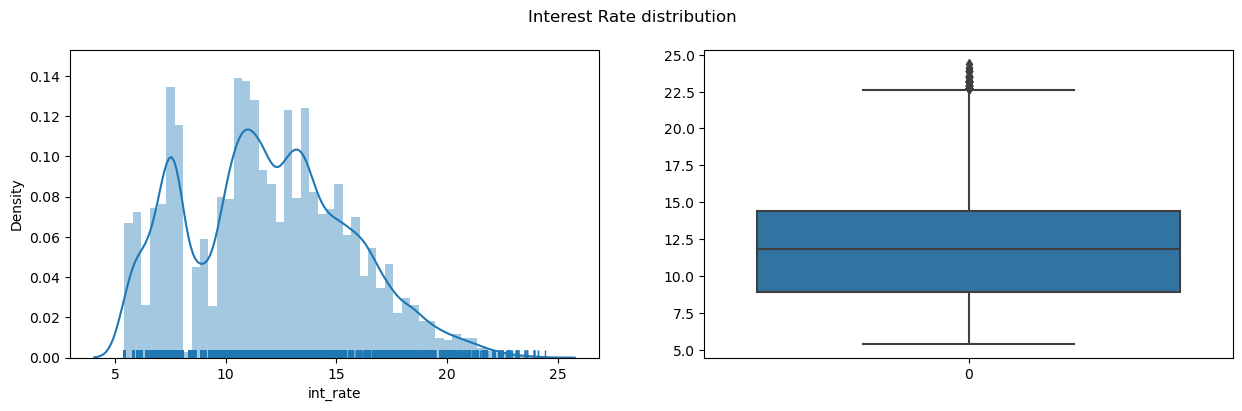

In [69]:
#Setting up the figure size of the plot
plt.figure(figsize=(15,4))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.distplot(a=df_loan.int_rate, rug=True)

#Setting subplot index
plt.subplot(1,2,2)

#Box plot
sns.boxplot(df_loan.int_rate)

#Single title for both subplots.
plt.suptitle('Interest Rate distribution')
plt.show()

##### Observations
- From interest rate data, we can say that most of the interest rate lies between 9% to 14.5%.

<b> Analyzing Actual Income </b>

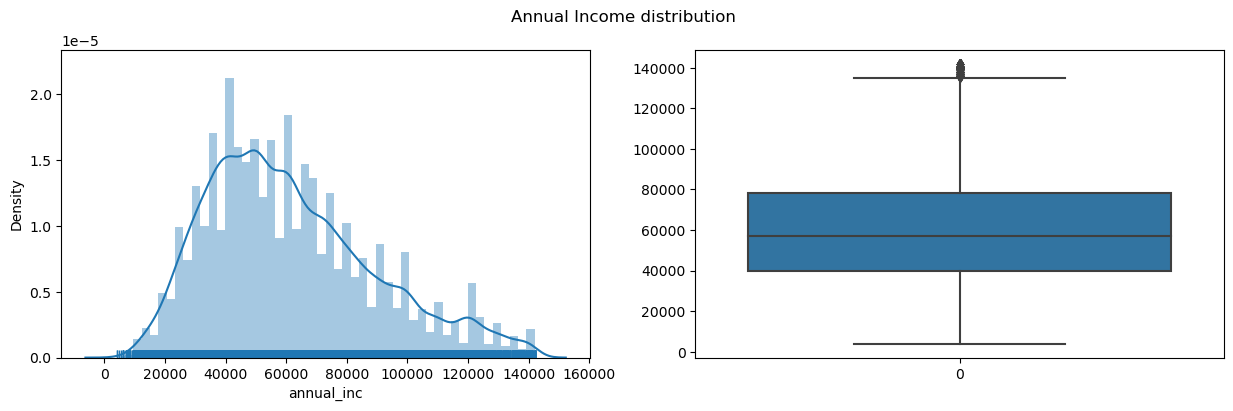

In [70]:
#Setting up the figure size of the plot
plt.figure(figsize=(15,4))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.distplot(df_loan.annual_inc, rug=True)

#Setting subplot index
plt.subplot(1,2,2)

#Box plot
sns.boxplot(df_loan.annual_inc)

#Single title for both subplots.
plt.suptitle('Annual Income distribution')
plt.show()

##### Observations
- From annual income data, we can say that most of the borrower's annual income are in range of <b>40,000</b> to <b>80,000</b>

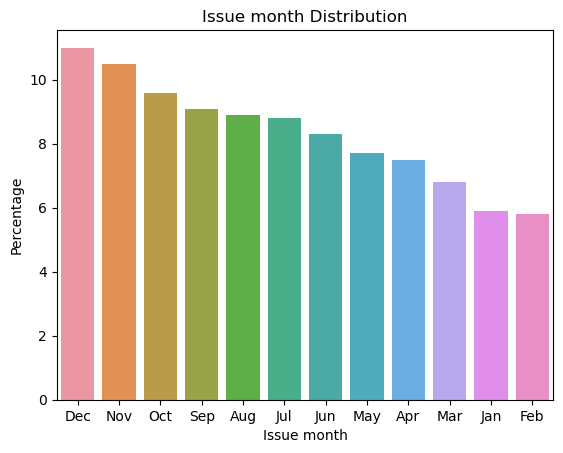

In [77]:
# Converting value_count into percentage
ls = df_loan["issue_d_month"].value_counts(normalize=True).mul(100).round(1).reset_index()
ls.columns = ['issue_d_month', 'percentage']

# Barplot
sns.barplot(data=ls, x="issue_d_month", y="percentage")
plt.xlabel("Issue month")
plt.ylabel('Percentage')
plt.title('Issue month Distribution')
plt.show()

##### Observations
- From Issue month data, we can say that issue of loan is increasing every month from jan to dec and in the final quarter of year there are more loan issued due to vacation.

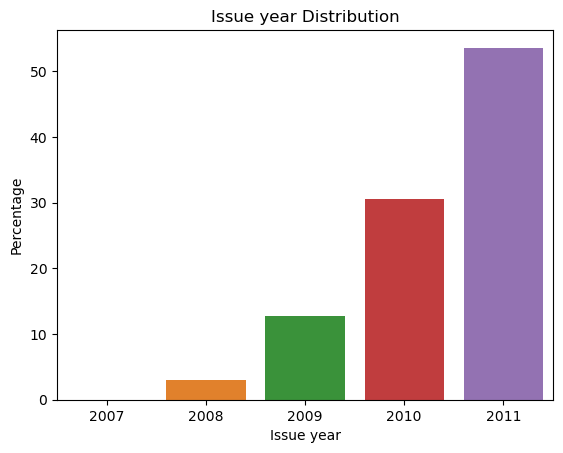

In [80]:
#converting value_count into percentage
ls = df_loan["issue_d_year"].value_counts(normalize=True).mul(100).round(1).reset_index()
ls.columns = ['issue_d_year', 'percentage']
#barplot
sns.barplot(data=ls, x="issue_d_year", y="percentage")
plt.xlabel("Issue year")
plt.ylabel('Percentage')
plt.title('Issue year Distribution')
plt.show()

##### Observations
- From Issue year data, we can say that lending club has really expanded year by year, every year the number of loans are doubled.

### Unordered Categorical Variables

<b> Analyzing Loan Status</b>

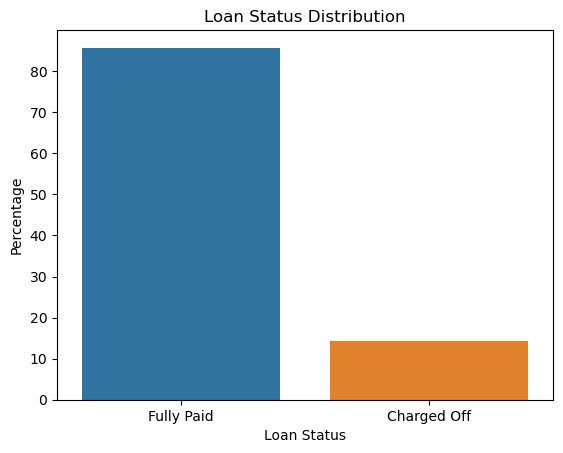

In [85]:
#converting value_count into percentage
ls = df_loan["loan_status"].value_counts(normalize=True).mul(100).round(1).reset_index()
ls.columns = ['loan_status', 'percentage']
#barplot
sns.barplot(data=ls, x="loan_status", y="percentage")
plt.xlabel("Loan Status")
plt.ylabel('Percentage')
plt.title('Loan Status Distribution')
plt.show()

##### Observations 
- From loan status data, we can say that 85.7% have fully paid whereas 14.3% are charged off.

<b> Analyzing purpose of loan </b>

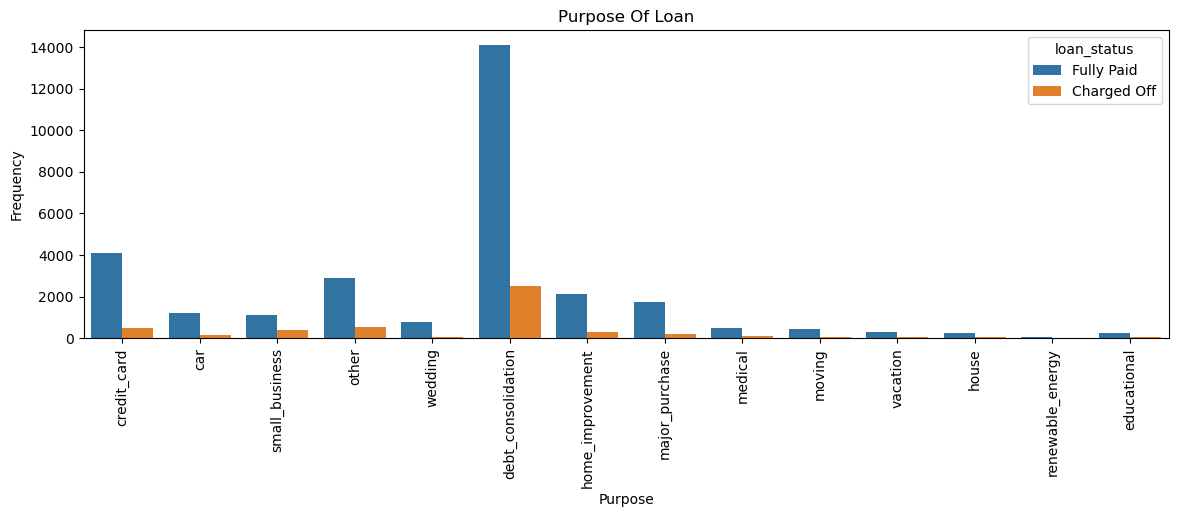

In [86]:
plt.figure(figsize=(14,4))
ax = sns.countplot(x="purpose", data=df_loan, hue= 'loan_status')
ax.set_title('Purpose Of Loan')
ax.set_ylabel('Frequency')
ax.set_xlabel('Purpose')  
plt.xticks(rotation=90)
plt.show()

#####  Observations
- From purpose data, we can say that most of them have taken loan for debt consolidation and paying credit card bills.
- Charged Off loan status is also high for debt consolidation.

<b> Analyzing Home Ownership</b>

<Figure size 1500x500 with 0 Axes>

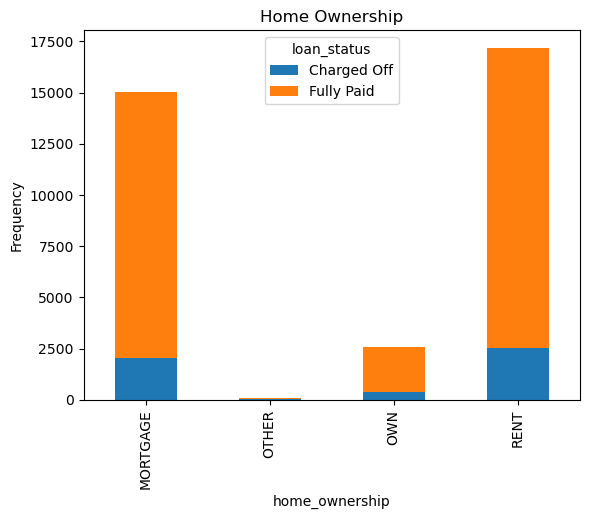

In [87]:
plt.figure(figsize=(15,5))
df_loan.groupby('home_ownership')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)
plt.title("Home Ownership",fontdict={'fontsize':12})
plt.xlabel("home_ownership")
plt.ylabel("Frequency")
plt.show()

#####  Observations
- From home ownership data, we can say that most of them have taken loan who are in rent or mortgage their home.
- Charged Off loan status is also high for these two home ownership.

### Ordered Categorical Variables

#### Analyzing Loan paying term

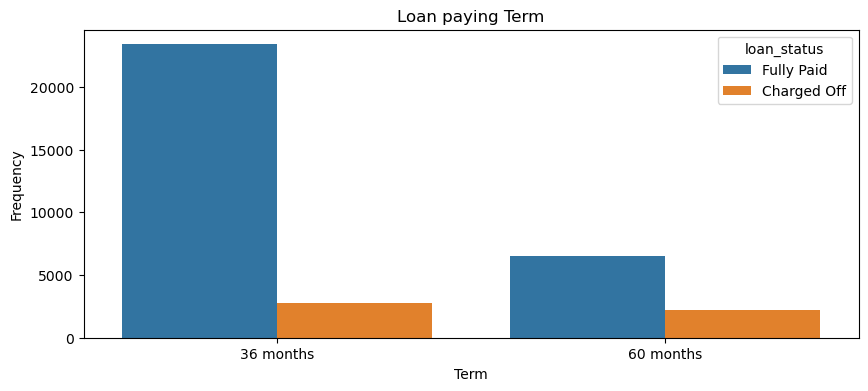

In [89]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x="term", data=df_loan, hue= 'loan_status')
ax.set_title('Loan paying Term')
ax.set_ylabel('Frequency')
ax.set_xlabel('Term')  
plt.show()

#####  Observations
- From term data, we can say that most of them have taken loan for 36 months as compared to 60 months.
- Charged Off loan status is also high for 60 months term wrt 36 months.

# Segmented Univariate Analysis

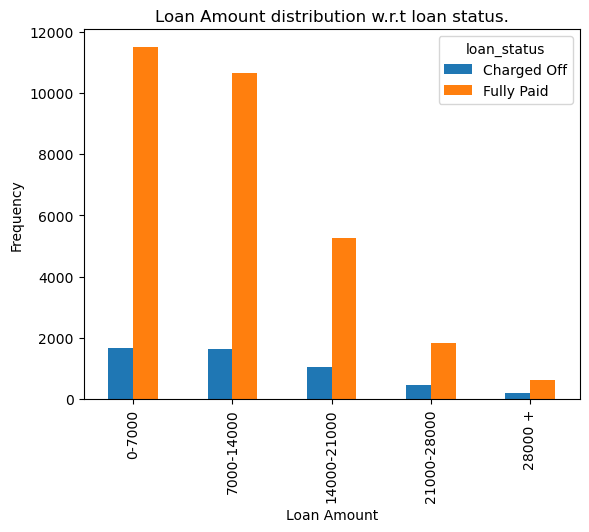

In [90]:
df_loan.groupby('loan_amnt_bin')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.title("Loan Amount distribution w.r.t loan status.")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

##### Observations
- From above we can say that, under 14k most of the borrowers take the loan amount and charged off status is also high for those amount.

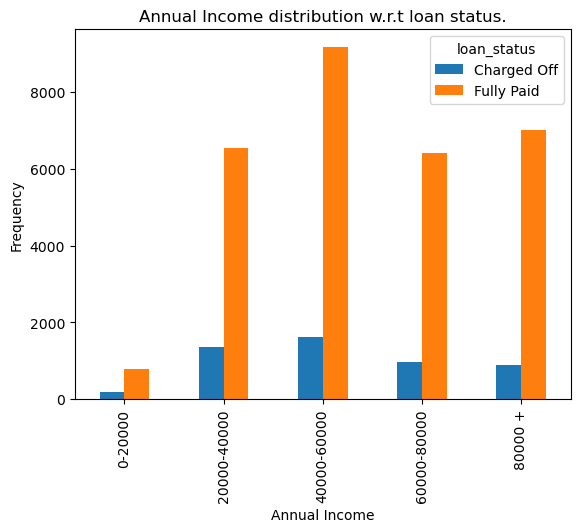

In [91]:
df_loan.groupby('annual_inc_bin')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.title("Annual Income distribution w.r.t loan status.")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

##### Observations
- From above chart we can say that, most of the borrower's annual income is in the range of 40k to 60k.

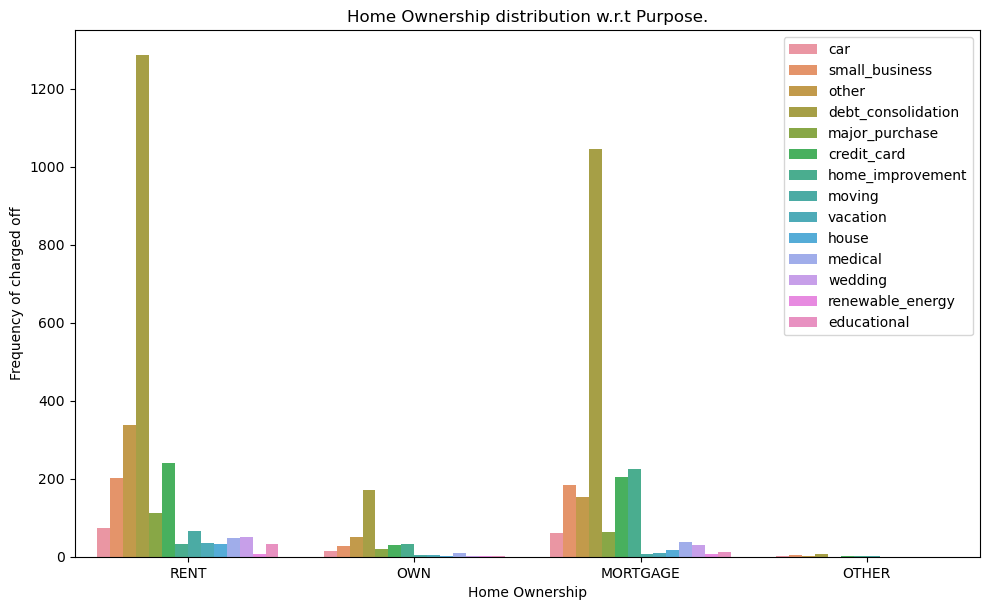

In [92]:
#home ownership and loan purpose for defaulted
plt.figure(figsize=(10,6))
sns.countplot(x='home_ownership',hue= 'purpose',data=df_loan[df_loan['loan_status']=='Charged Off'])
plt.tight_layout()
plt.title("Home Ownership distribution w.r.t Purpose.")
plt.xlabel("Home Ownership")
plt.ylabel("Frequency of charged off")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

##### Observations
- From above chart we can say that, most of the borrower's who took loan for the purpose of debt consolidation has highest number of Charged off status and those who are in rent as the most.

# Bivariate Analysis

Let's analyse <b>Loan amount</b> with every variables.

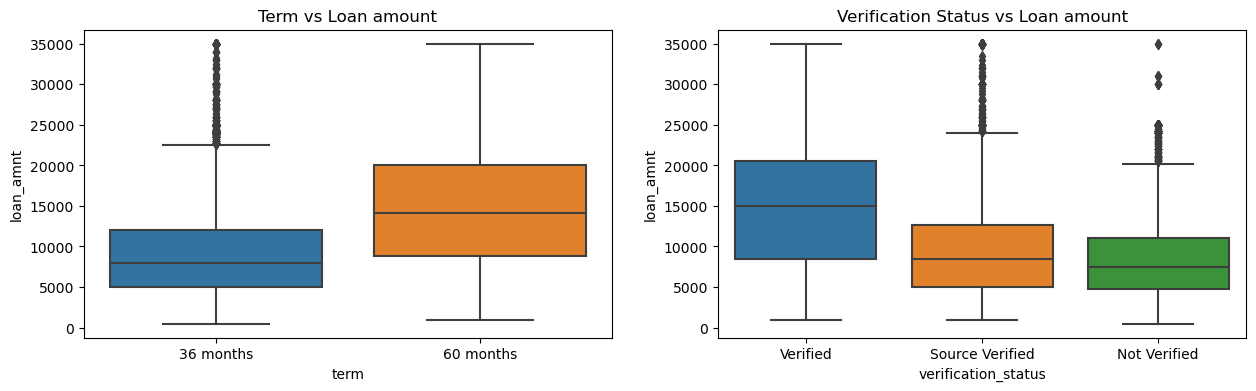

In [93]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="loan_amnt", data=df_loan)
plt.title("Term vs Loan amount")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="loan_amnt", data=df_loan)
plt.title("Verification Status vs Loan amount")
plt.show()

##### Observations
- In loan amount vs term variable we can say that, more the loan amount higher is the tenure i.e. 60 months. Its median is only 15k whereas the median of 36 month is 8k.
- In Verification status vs loan amount we can say that, Verified borrower gets more loan amount than Non-verified and Source Verified i.e. above 10k loan amount everyone are verified.

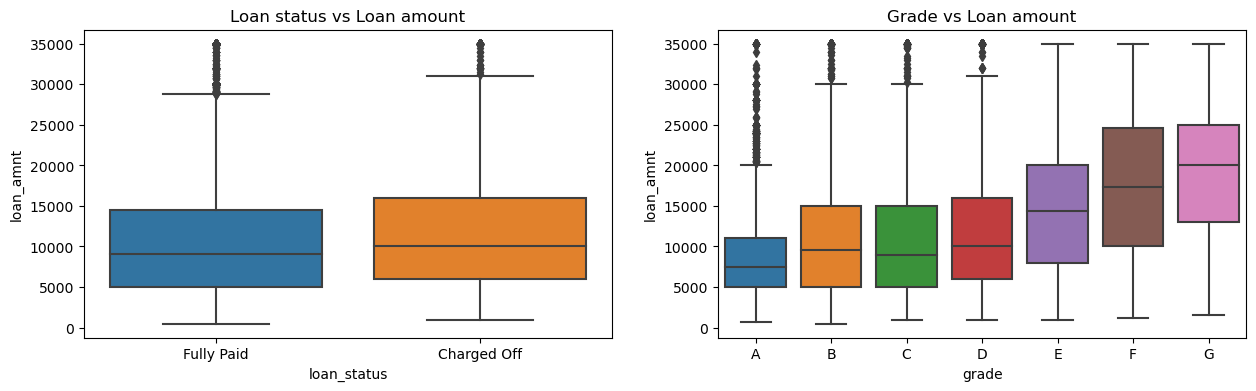

In [95]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="loan_amnt", data=df_loan)
plt.title("Loan status vs Loan amount")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = df_loan["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="loan_amnt", order= grade_order, data=df_loan)
plt.title("Grade vs Loan amount")
plt.show()

##### Observations
- In loan amount vs Loan status variable we can say that, charged off were having higher loan amount than fully paid.
- In Grade vs loan amount we can say that, grade F & G are having max amount of loan. As the grade decreases amount of loan is increasing.
- From this we can say that higher the grade more is the risk of default.

Text(0.5, 1.0, 'Home Ownership vs Loan amount')

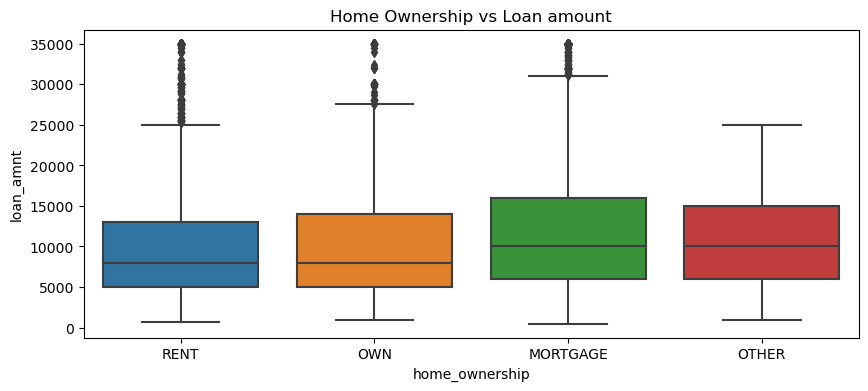

In [96]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="loan_amnt", data=df_loan)
plt.title("Home Ownership vs Loan amount")

##### Observations
- In loan amount vs home ownership variable we can say that, the borrower who are from Mortgage have taken higher amount of loan then others.

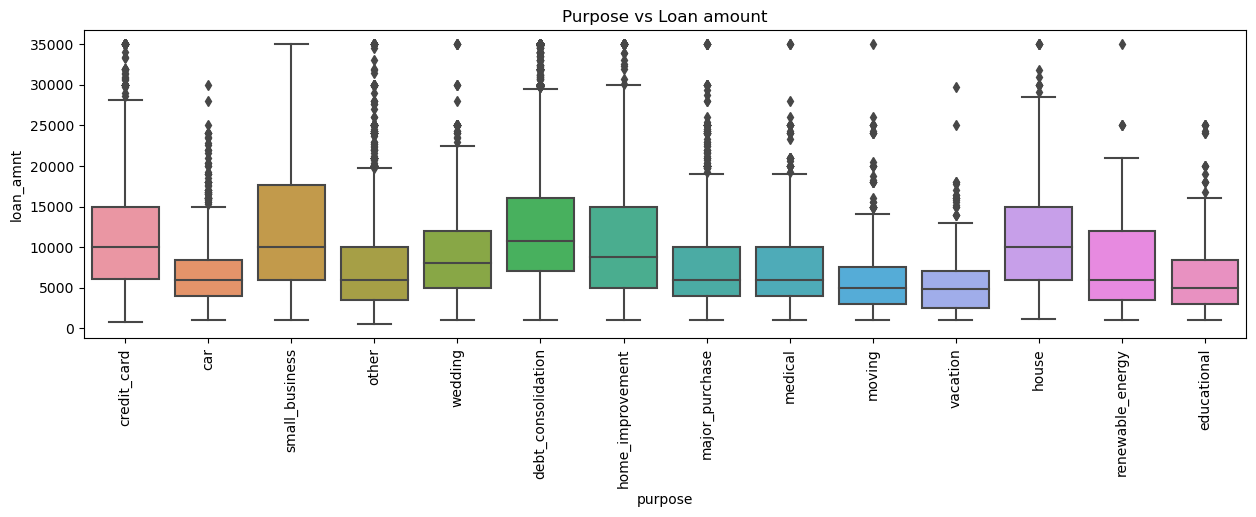

In [98]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="loan_amnt", data = df_loan)
plt.title("Purpose vs Loan amount")
plt.xticks(rotation=90)
plt.show()

##### Observations
- In loan amount vs purpose variable we can say that, to startup with small business borrowers are takinh high loan than others. Then comes debt_consolidation.

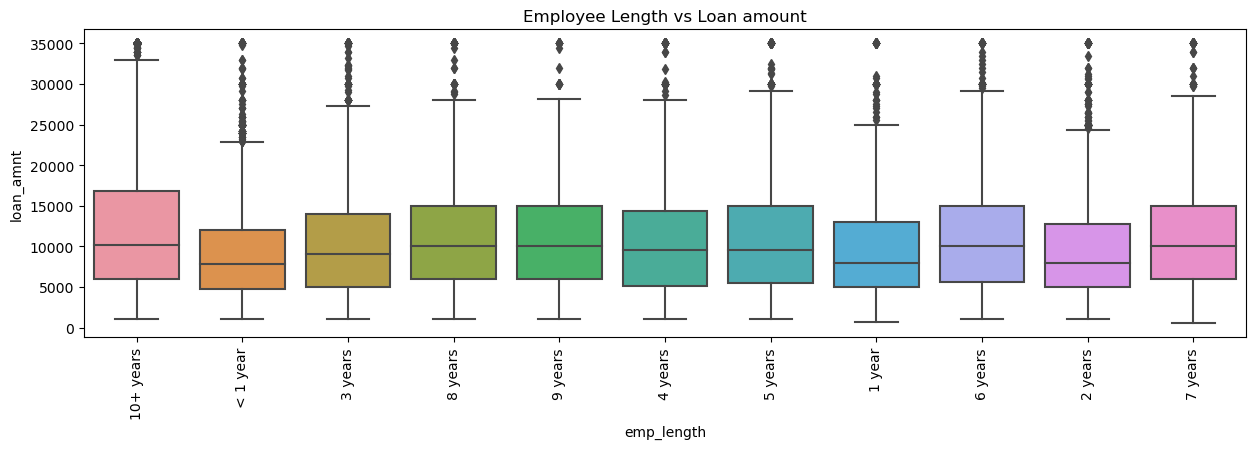

In [99]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="loan_amnt", data=df_loan)
plt.title("Employee Length vs Loan amount")
plt.xticks(rotation=90)
plt.show()

##### Observations
- In loan amount vs employee length variable we can say that, the borrower who has 10+ years of experience are taking high amount of loan than others and borrowers with less than 1 year of experience are taking lesser amount of loan compared to others. 

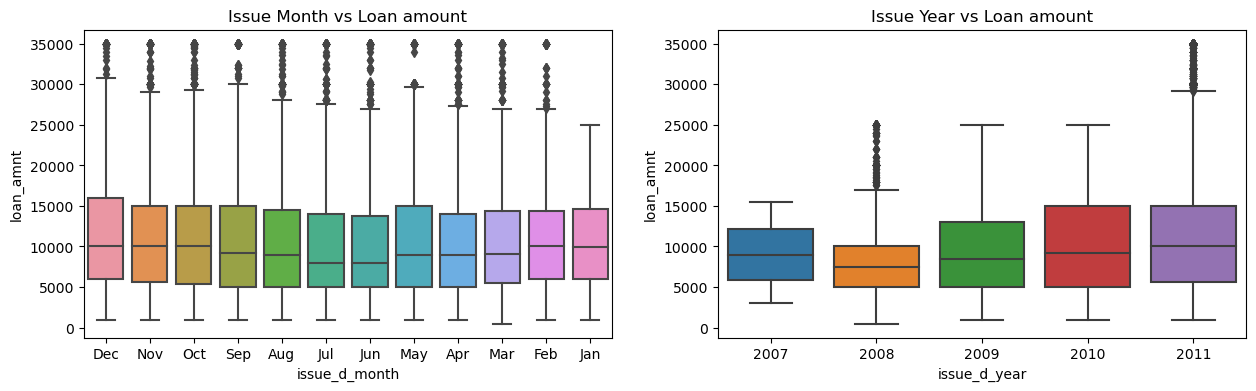

In [100]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="issue_d_month", y="loan_amnt", data=df_loan)
plt.title("Issue Month vs Loan amount")
plt.subplot(1,2,2)
sns.boxplot(x="issue_d_year", y="loan_amnt", data=df_loan)
plt.title("Issue Year vs Loan amount")
plt.show()

##### Observations
- In loan amount vs issue month variable we can say that, highest loan amount is taken in the month of Dec and May whereas median value doesn't vary too much.
- In Issue year vs loan amount we can say that, highest loan amount is taken in the year 2008 and 2011 as we can see in outliers by some borrowers. And we can say that median value doesn't vary too much but as the year increases high amount of loans are taken.

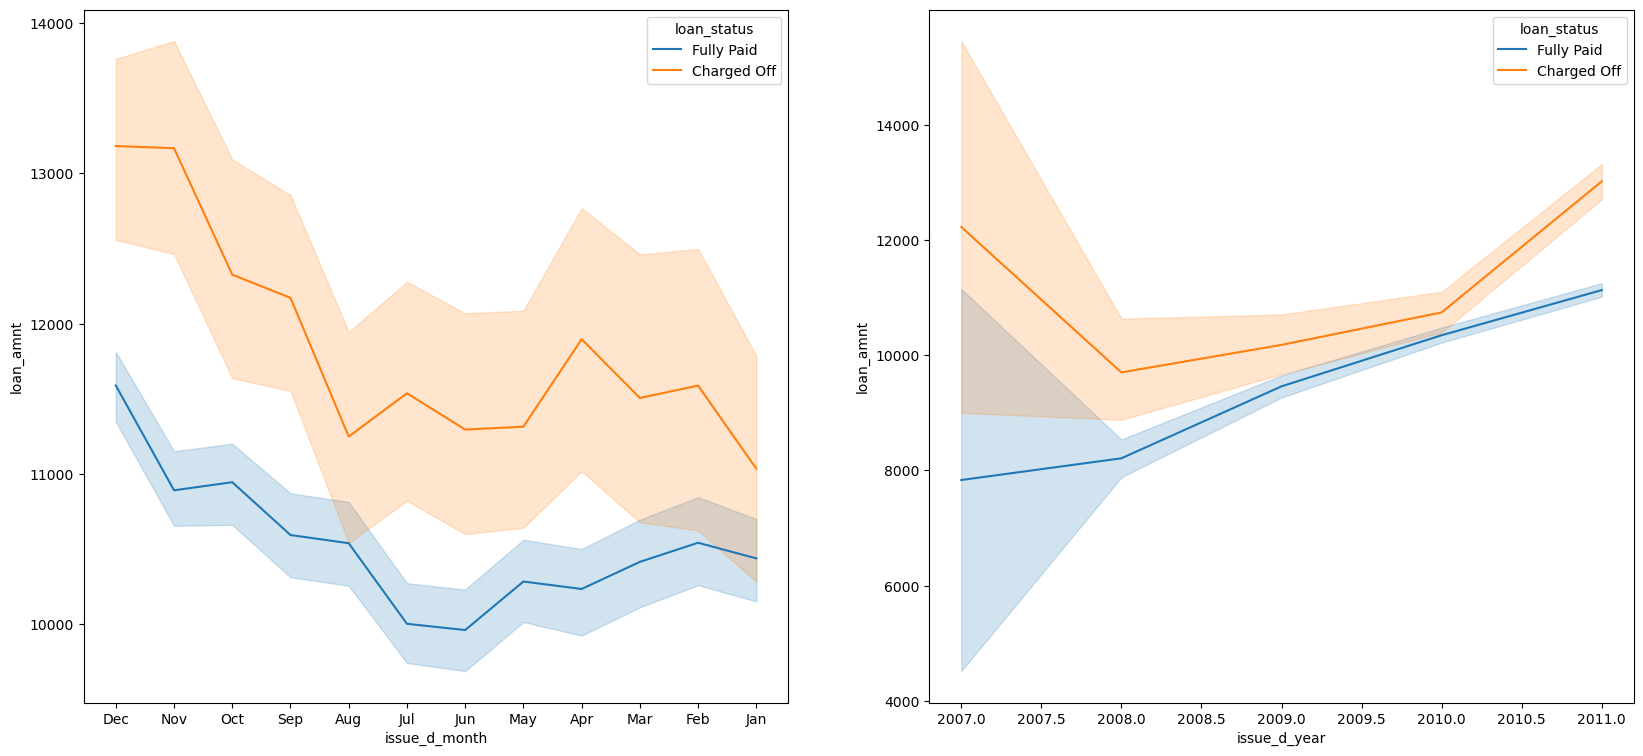

In [101]:
plt.figure(figsize=(20,9))
plt.subplot(121)
sns.lineplot(data =df_loan ,y='loan_amnt', x='issue_d_month', hue ='loan_status')
plt.subplot(122)
sns.lineplot(data =df_loan ,y='loan_amnt', x='issue_d_year', hue ='loan_status')
plt.show()

##### Observations
- From above lineplot we can say that, higher the loam amount, more is the charged off frequency.
- And the borrower who took the loan in the month of november and december are having highest charged off ratio with highest loan amount.

Let's analyse <b>Annual Income</b> with every variables.

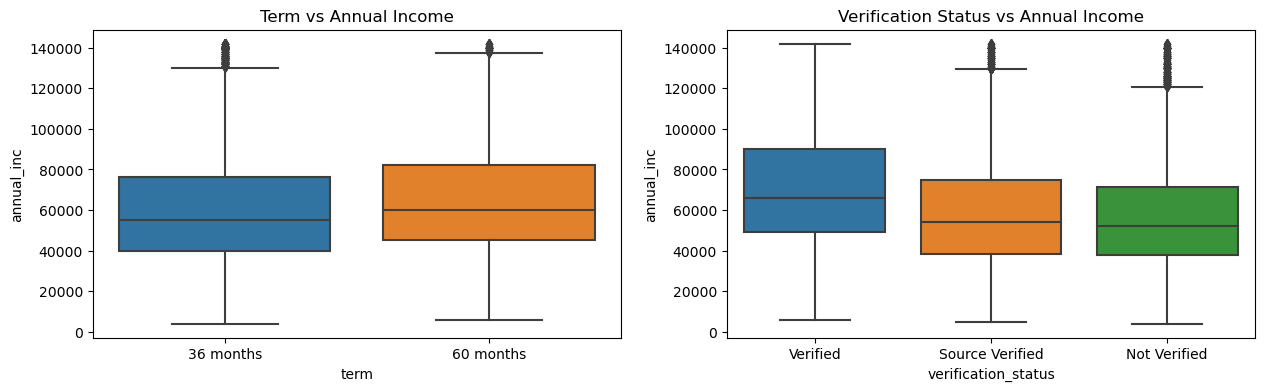

In [102]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="annual_inc", data=df_loan)
plt.title("Term vs Annual Income")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="annual_inc", data=df_loan)
plt.title("Verification Status vs Annual Income")
plt.show()

##### Observations
- In Term vs Annual Income variable we can say that, the borrowers who have high annual income are taking loans for 60 months tenure as compared to 36 months.
- In Verification status vs annual income we can say that, mostly the verified borrowers are having high annual income than others.

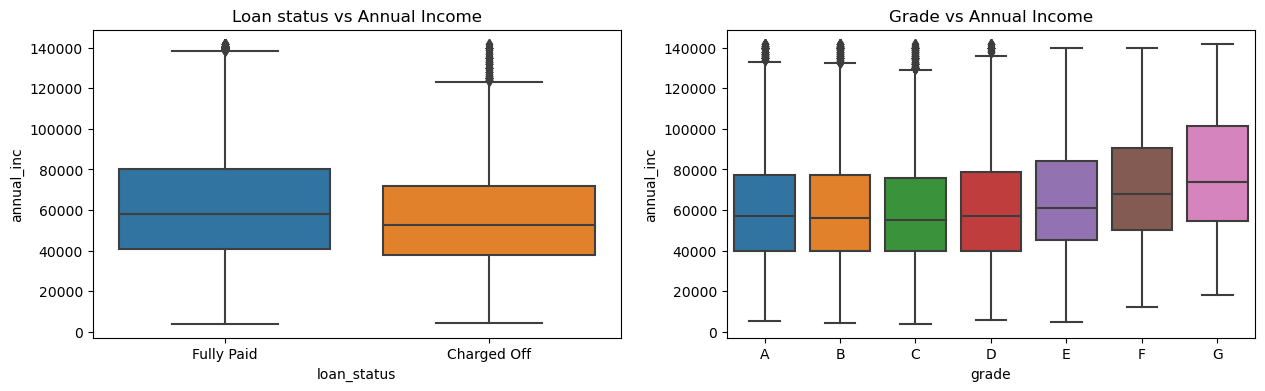

In [104]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="annual_inc", data=df_loan)
plt.title("Loan status vs Annual Income")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = df_loan["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="annual_inc", order= grade_order, data=df_loan)
plt.title("Grade vs Annual Income")
plt.show()

##### Observations
- In loan amount vs term variable we can say that, more the loan amount higher is the tenure i.e. 60 months. Its median is only 15k whereas the median of 36 month is 8k.
- In Verification status vs loan amount we can say that, Verified borrower gets more loan amount than Non-verified and Source Verified i.e. above 10k loan amount everyone are verified.

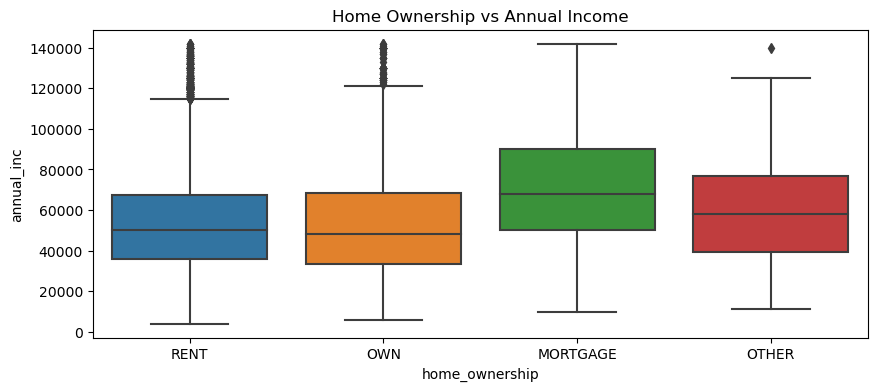

In [105]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="annual_inc", data=df_loan)
plt.title("Home Ownership vs Annual Income")
plt.show()

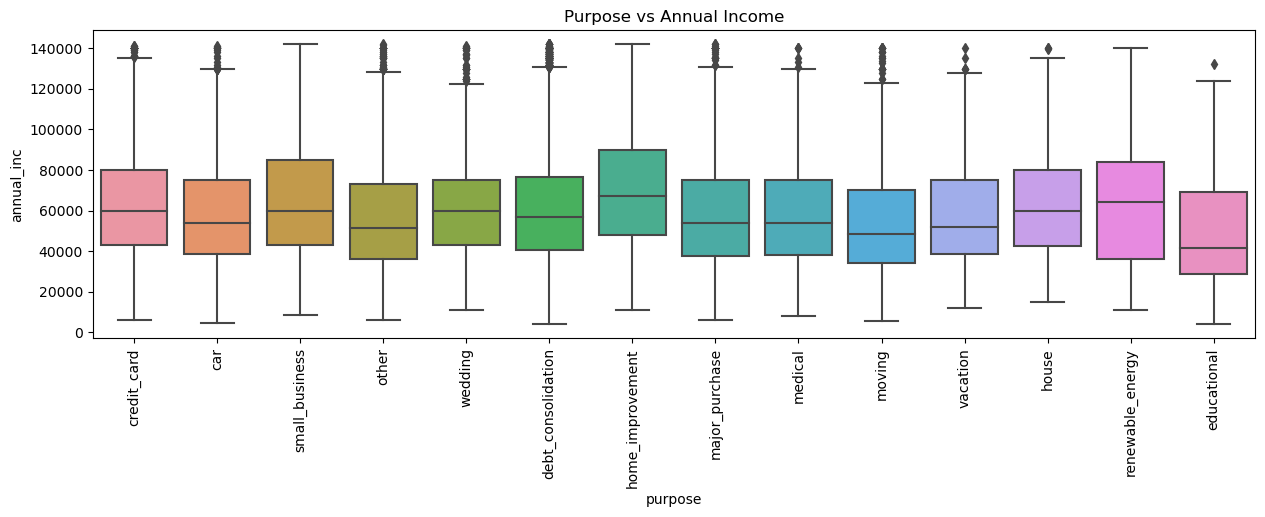

In [106]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="annual_inc", data=df_loan)
plt.title("Purpose vs Annual Income")
plt.xticks(rotation=90)
plt.show()

##### Observations
- In Annual Income vs Purpose variable we can say that, the borrowers who has high annual income are taking loans mostly for home improvement and small business.

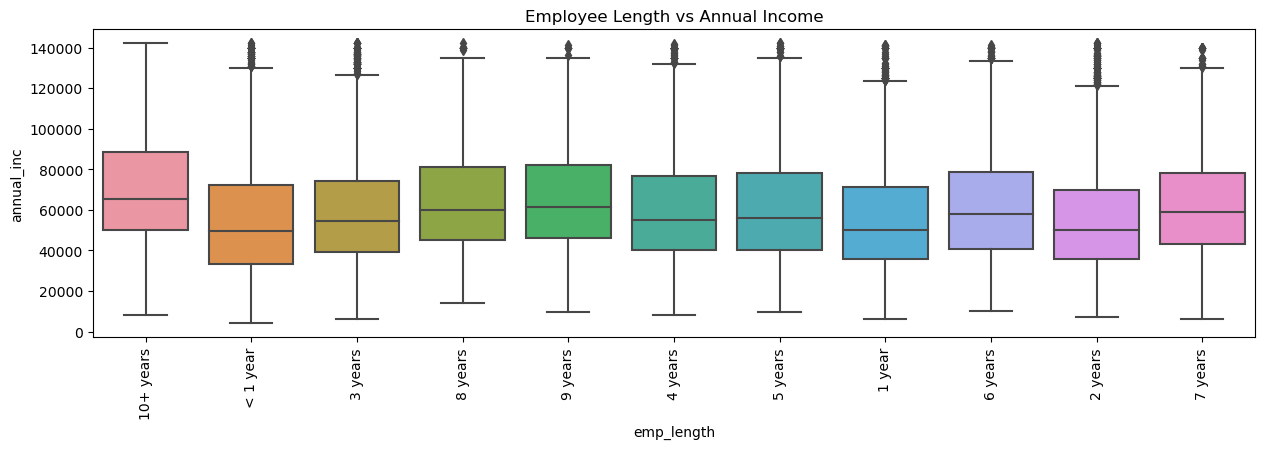

In [107]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="annual_inc", data=df_loan)
plt.title("Employee Length vs Annual Income")
plt.xticks(rotation=90)
plt.show()

##### Observations
- In Annual income vs employee length variable we can say that, as we expected the borrowers who has 10+ experience are having highest annual income than others and <1 is having least.

Let's segment <b>Interest Rate</b> with every variables.

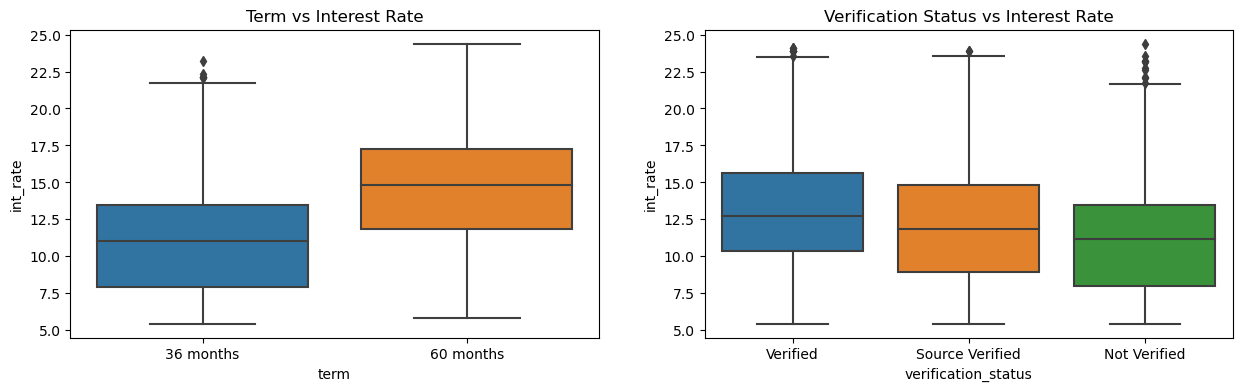

In [108]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="int_rate", data=df_loan)
plt.title("Term vs Interest Rate")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="int_rate", data=df_loan)
plt.title("Verification Status vs Interest Rate")
plt.show()

##### Observations
- In term vs interest rate variable we can say that, interest rate is less for those who take loan for 36 months and high for 60 months. 
- In term vs interest rate variable we can say that, Verified borrower gets more loan at higher interest rate compared to others.

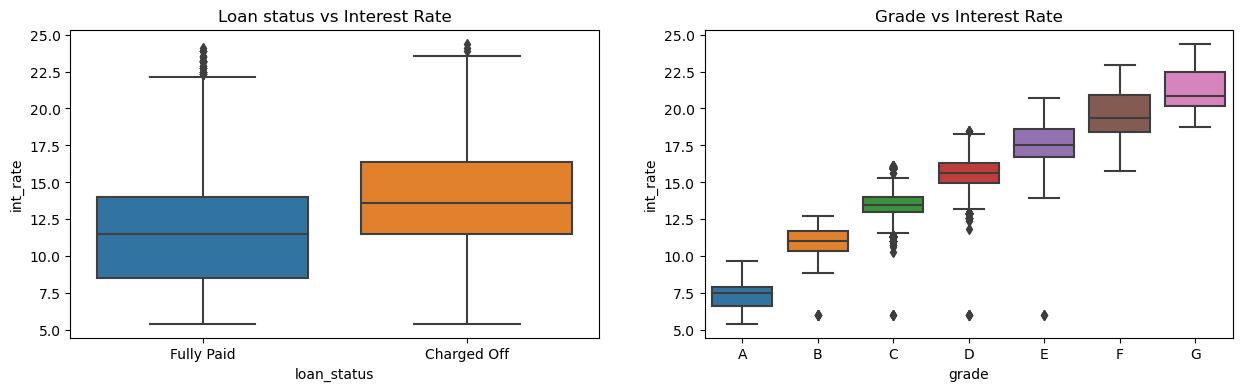

In [109]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="int_rate", data=df_loan)
plt.title("Loan status vs Interest Rate")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = df_loan["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="int_rate", order= grade_order, data=df_loan)
plt.title("Grade vs Interest Rate")
plt.show()

##### Observations
- In loan status vs interest rate variable we can say that, the borrowers who has high interest rate are mostly defaulters.
- In grade vs interest rate we can say that, as the grade decreases, interest rate is also increasing.

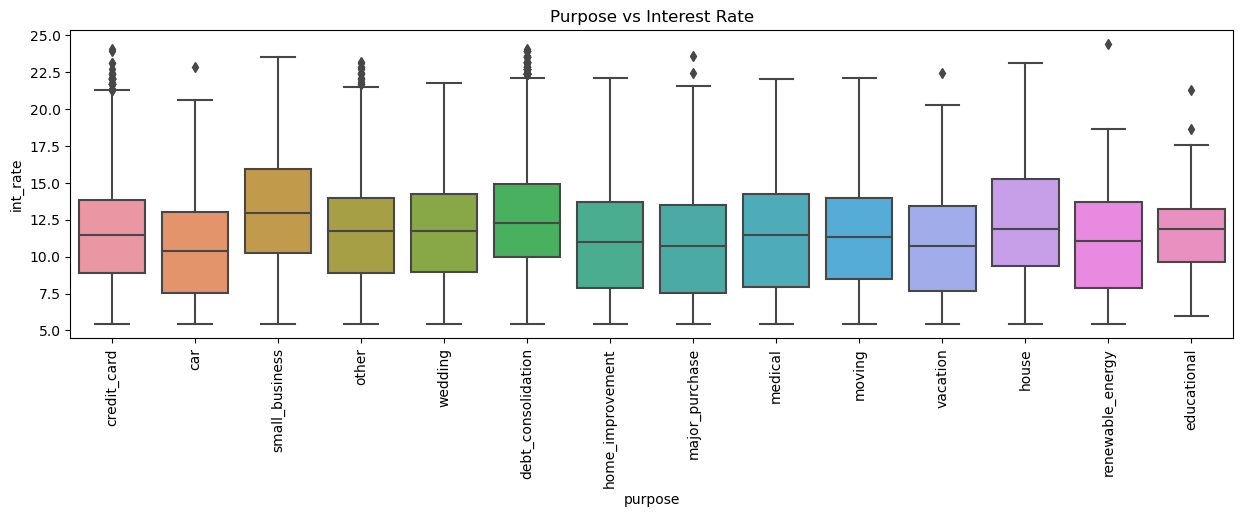

In [110]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="int_rate", data=df_loan)
plt.title("Purpose vs Interest Rate")
plt.xticks(rotation=90)
plt.show()

##### Observations
- In purpose vs interest rate variable we can say that, small business , debt consolidation and house loan are geeting loan at high interest rate than others.

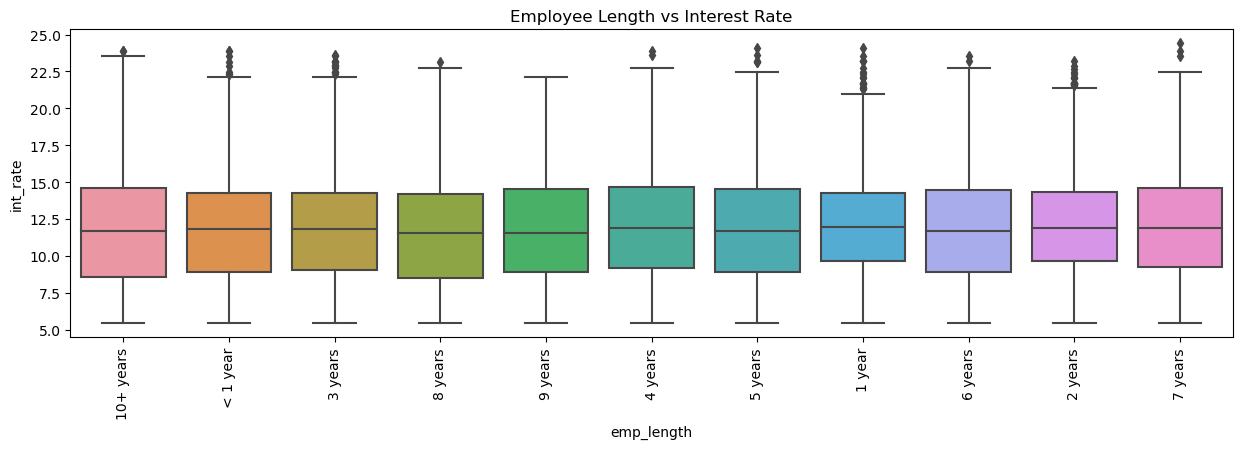

In [111]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="int_rate", data=df_loan)
plt.title("Employee Length vs Interest Rate")
plt.xticks(rotation=90)
plt.show()

##### Observations
- There is no much relation between Employment length and interest rate.

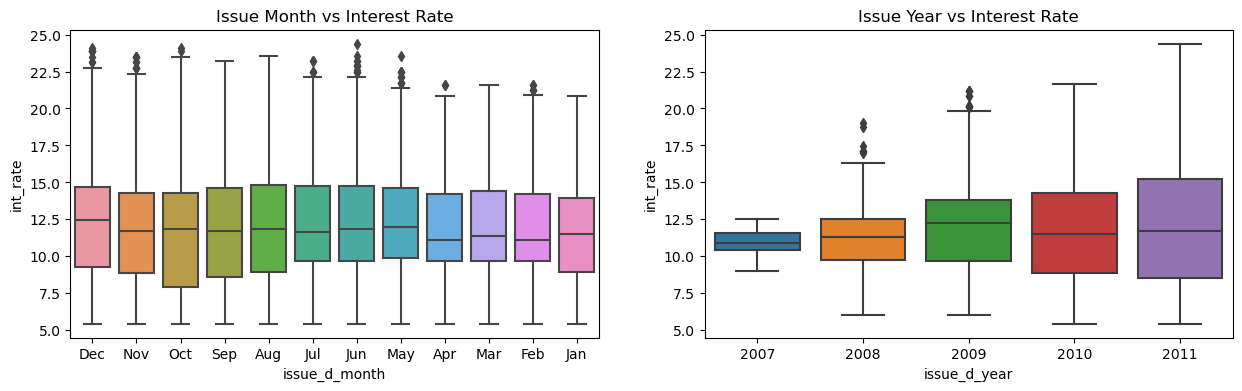

In [112]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="issue_d_month", y="int_rate", data=df_loan)
plt.title("Issue Month vs Interest Rate")
plt.subplot(1,2,2)
sns.boxplot(x="issue_d_year", y="int_rate", data=df_loan)
plt.title("Issue Year vs Interest Rate")
plt.show()

##### Observations
- As the year goes on the rate of interest is getting diversed but the median remains same throughout the year.

Let's segment <b>Debt to income ratio</b> with every variables.

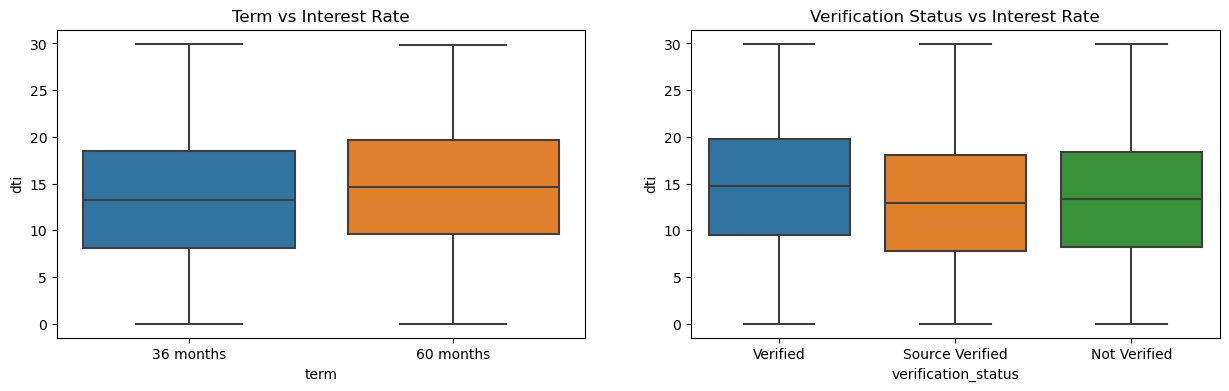

In [113]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="dti", data=df_loan)
plt.title("Term vs Interest Rate")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="dti", data=df_loan)
plt.title("Verification Status vs Interest Rate")
plt.show()

##### Observations
- In interest rate vs term variable we can say that, dti ratio is high for the borrower who has 60 months tenure.
- In Verification status vs dti we can say that, verified borrowers are having high dti ratio.

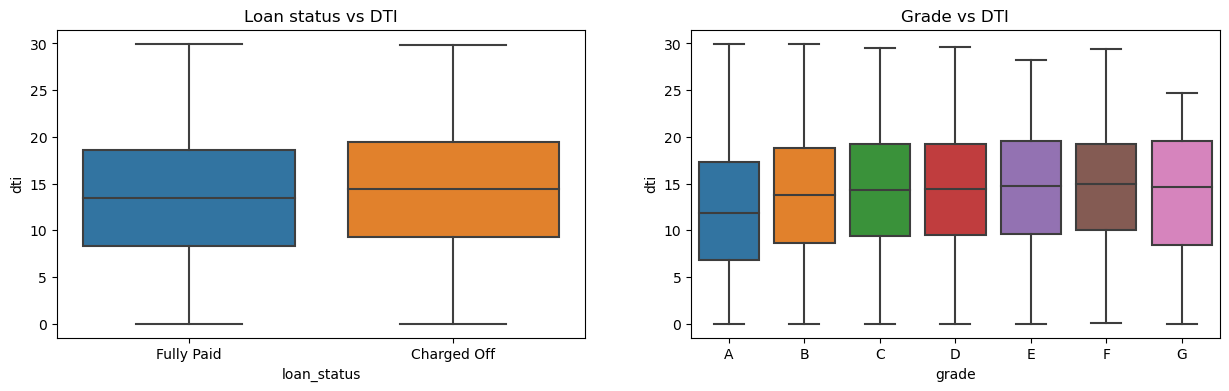

In [115]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="dti", data=df_loan)
plt.title("Loan status vs DTI")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = df_loan["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="dti", order= grade_order, data=df_loan)
plt.title("Grade vs DTI")
plt.show()

##### Observations
- Most of the charged off borrowers are having high dti ratio.
- As grade decreases dti ratio is increasing.

Text(0.5, 1.0, 'Home Ownership vs DTI')

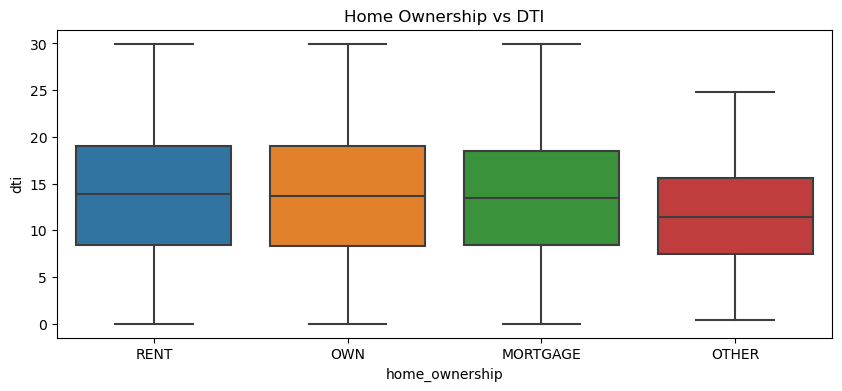

In [116]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="dti", data=df_loan)
plt.title("Home Ownership vs DTI")

##### Observations
- In <b>DTI</b> vs <b>Home Ownership</b> variable we can say that, the borrower with own and rent home status are having high dti ratio than others.

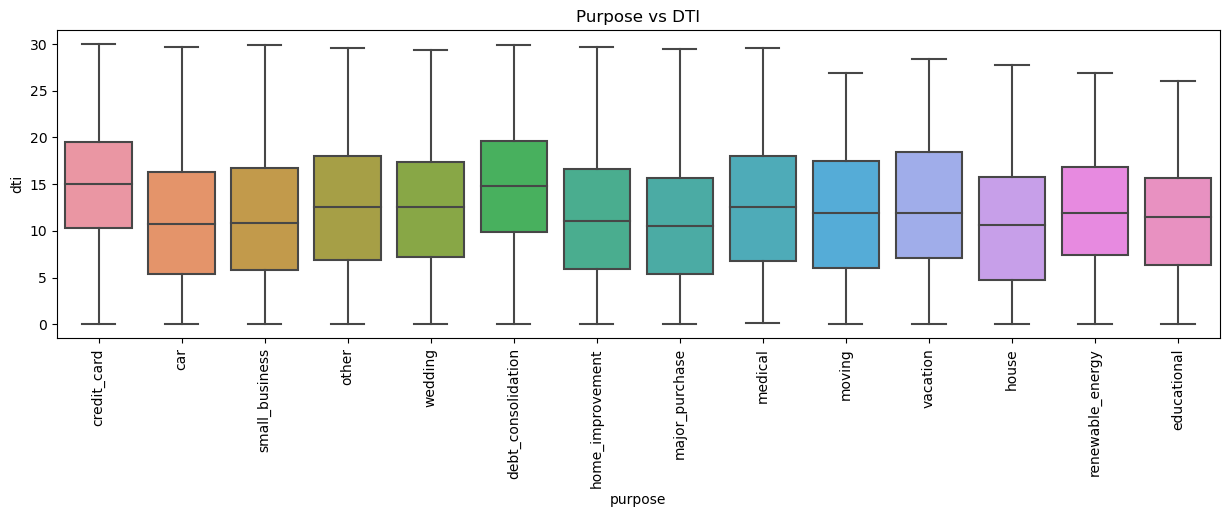

In [117]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="dti", data=df_loan)
plt.title("Purpose vs DTI")
plt.xticks(rotation=90)
plt.show()

##### Observations
- In purpose vs dti variable we can say that, the borrower who takes loan for the purpose of debt consolidation and credit card are having high dti ratio than others. 

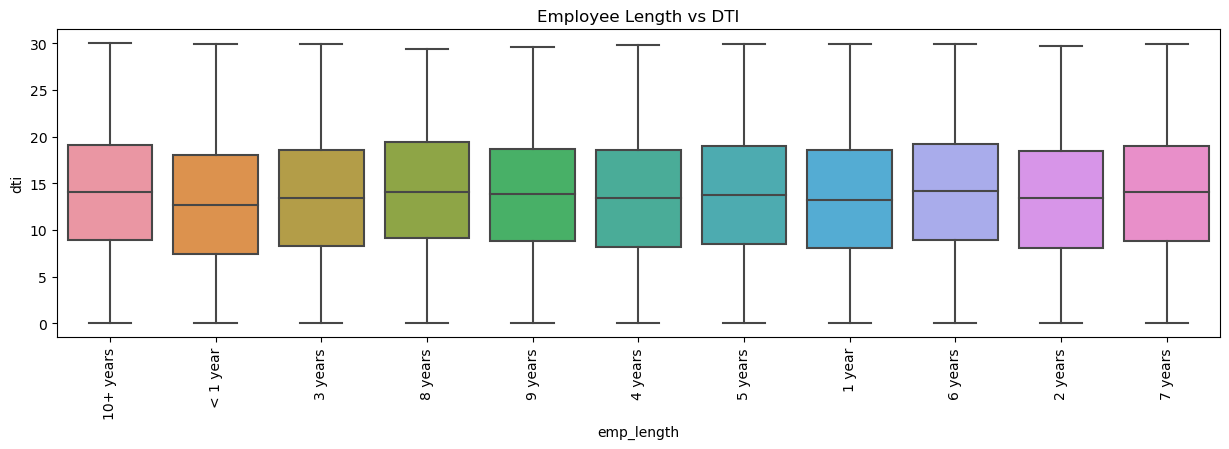

In [118]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="dti", data=df_loan)
plt.title("Employee Length vs DTI")
plt.xticks(rotation=90)
plt.show()

##### Observations
- There is no much relation between employee length and dti ratio.

Now, Let us analyse Charged Off Proportion with each variables.

In [119]:
#grouping annual income bin and loan status
annual_inc_bin_vs_loan_status = df_loan.groupby(['annual_inc_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
#creating "Total" variable
annual_inc_bin_vs_loan_status['Total'] = annual_inc_bin_vs_loan_status['Charged Off'] + annual_inc_bin_vs_loan_status['Fully Paid'] 
#calculating chargedoff proportion
annual_inc_bin_vs_loan_status['Chargedoff_Proportion'] = annual_inc_bin_vs_loan_status['Charged Off'] / annual_inc_bin_vs_loan_status['Total']
#sorting the chargedoff proportion in descending order
annual_inc_bin_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_bin,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,173,774,947,0.182682
1,20000-40000,1369,6539,7908,0.173116
2,40000-60000,1630,9167,10797,0.150968
3,60000-80000,957,6400,7357,0.130080
4,80000 +,876,7014,7890,0.111027


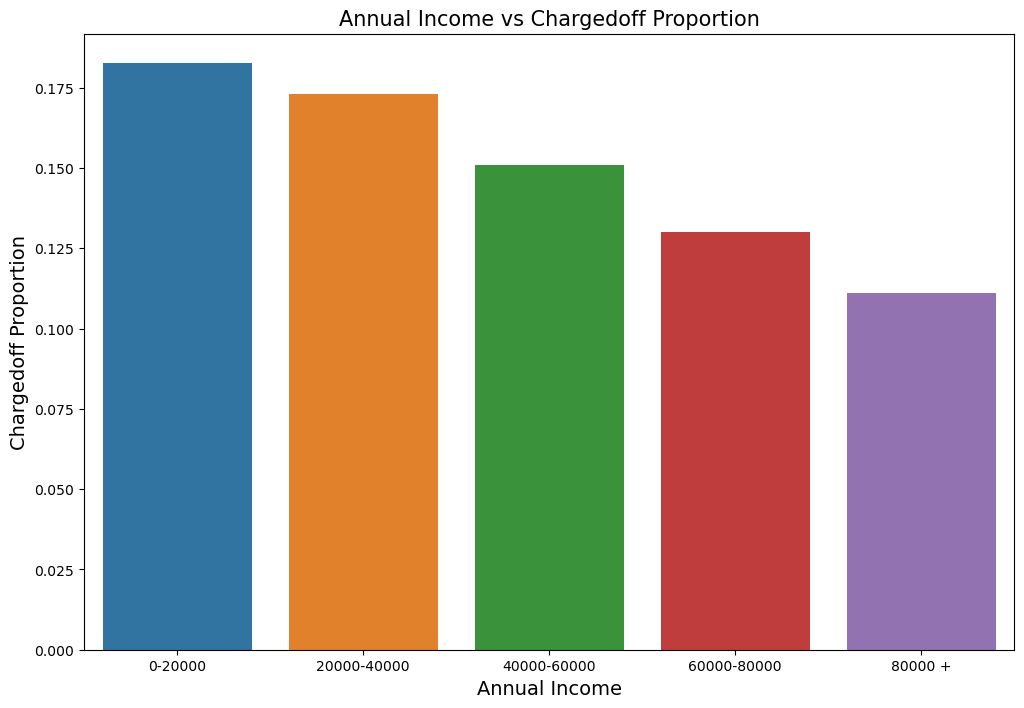

In [120]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15)
#barplot
ax1=sns.barplot(x='annual_inc_bin', y='Chargedoff_Proportion', data=annual_inc_bin_vs_loan_status)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
ax1.set_xlabel('Annual Income',fontsize=14)
plt.show()

##### Observations
- From above chart we can say that, as annual income is increasing charged off proportion is decreasing.
- So highest charged off proportion are in the range 0 to 20k annual income.

In [121]:
purpose_vs_loan_status = df_loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan_status['Total'] = purpose_vs_loan_status['Charged Off'] + purpose_vs_loan_status['Fully Paid'] 
purpose_vs_loan_status['Chargedoff_Proportion'] = purpose_vs_loan_status['Charged Off'] / purpose_vs_loan_status['Total']
purpose_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,417,1111,1528,0.272906
10,renewable_energy,16,70,86,0.186047
3,educational,46,234,280,0.164286
5,house,52,267,319,0.163009
7,medical,97,512,609,0.159278
9,other,543,2884,3427,0.158448
8,moving,79,437,516,0.153101
2,debt_consolidation,2509,14107,16616,0.150999
12,vacation,49,282,331,0.148036
4,home_improvement,292,2140,2432,0.120066


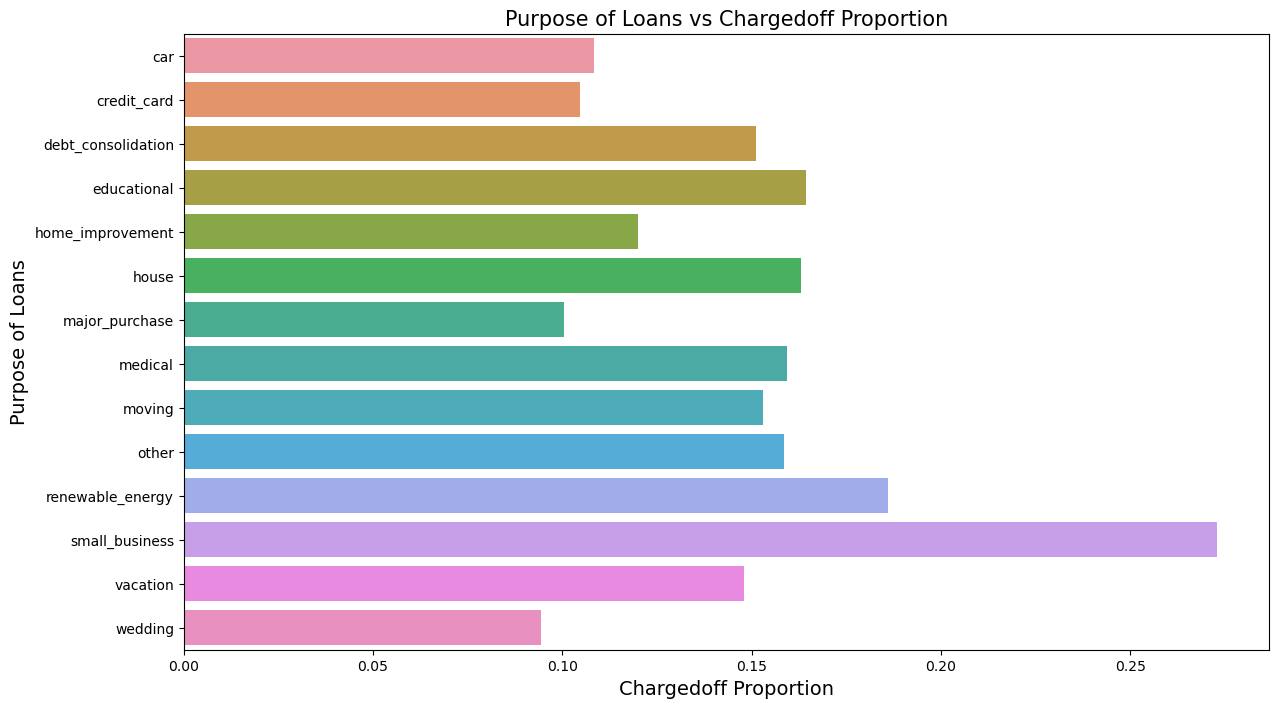

In [122]:
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan_status)
ax1.set_ylabel('Purpose of Loans',fontsize=14)
ax1.set_xlabel('Chargedoff Proportion',fontsize=14)
plt.show()

##### Observations
- From above we can say that, the borrower who take loan for the purpose of small-business has the maximum charged off proportion.

In [123]:
grade_vs_loan_status = df_loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan_status['Total'] = grade_vs_loan_status['Charged Off'] + grade_vs_loan_status['Fully Paid'] 
grade_vs_loan_status['Chargedoff_Proportion'] = grade_vs_loan_status['Charged Off'] / grade_vs_loan_status['Total']
grade_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,90,166,256,0.351562
5,F,276,575,851,0.324324
4,E,624,1731,2355,0.264968
3,D,1000,3596,4596,0.217581
2,C,1208,5906,7114,0.169806
1,B,1269,9321,10590,0.119830
0,A,538,8599,9137,0.058881


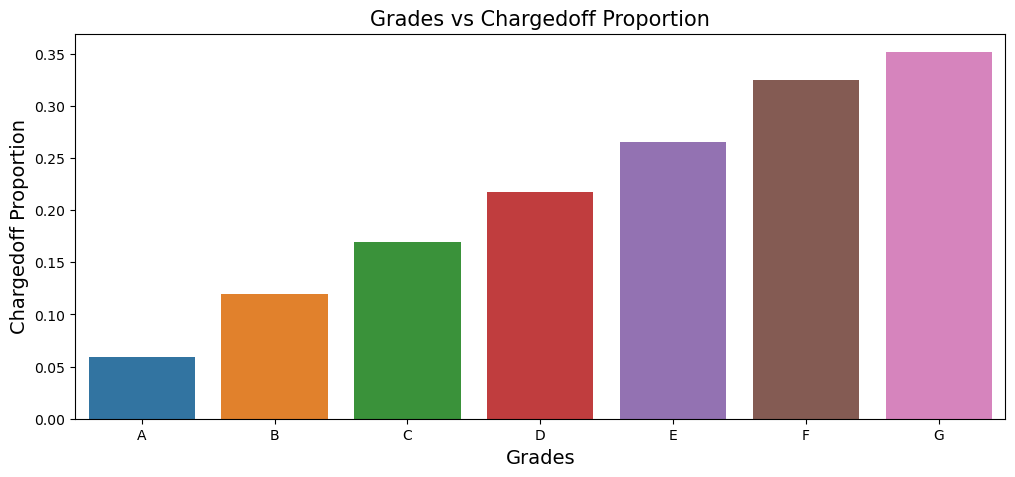

In [124]:
fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan_status)
ax1.set_xlabel('Grades',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

##### Observations
- From above chart we can say that, as grades are decreasing charged off proportion is increasing.

In [127]:
sub_grade_vs_loan_status = df_loan.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
sub_grade_vs_loan_status['Total'] = sub_grade_vs_loan_status['Charged Off'] + sub_grade_vs_loan_status['Fully Paid'] 
sub_grade_vs_loan_status['Chargedoff_Proportion'] = sub_grade_vs_loan_status['Charged Off'] / sub_grade_vs_loan_status['Total']
sub_grade_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,sub_grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
29,F5,48,45,93,0.516129
32,G3,19,22,41,0.463415
34,G5,9,12,21,0.428571
31,G2,25,41,66,0.378788
28,F4,45,87,132,0.340909
30,G1,26,57,83,0.313253
26,F2,62,143,205,0.302439
23,E4,112,266,378,0.296296
27,F3,44,108,152,0.289474
25,F1,77,192,269,0.286245


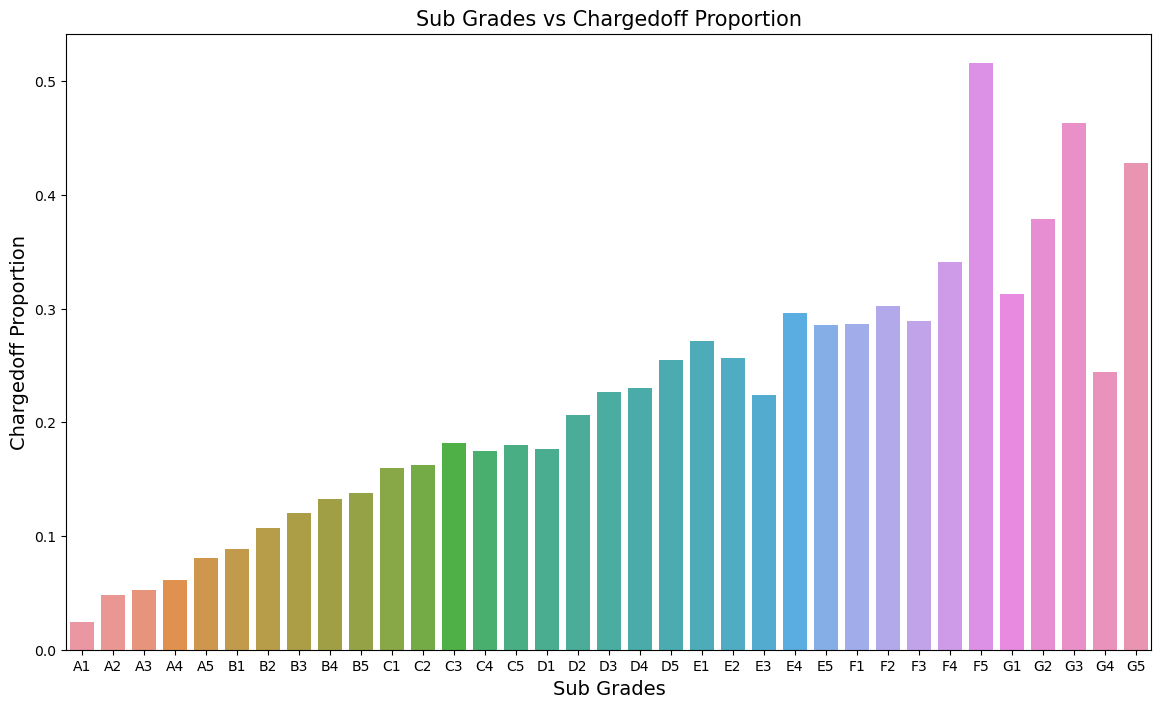

In [128]:
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=sub_grade_vs_loan_status)
ax1.set_xlabel('Sub Grades',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

##### Observations
- Subgrade F5, G3 and G5 are having maximum charged off proportion.

In [129]:
int_rate_bin_vs_loan_status = df_loan.groupby(['int_rate_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
int_rate_bin_vs_loan_status['Total'] = int_rate_bin_vs_loan_status['Charged Off'] + int_rate_bin_vs_loan_status['Fully Paid'] 
int_rate_bin_vs_loan_status['Chargedoff_Proportion'] = int_rate_bin_vs_loan_status['Charged Off'] / int_rate_bin_vs_loan_status['Total']
int_rate_bin_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_bin,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,15-20,1627,4942,6569,0.247678
1,10-15,2405,14182,16587,0.144993
0,5-10,714,10368,11082,0.064429


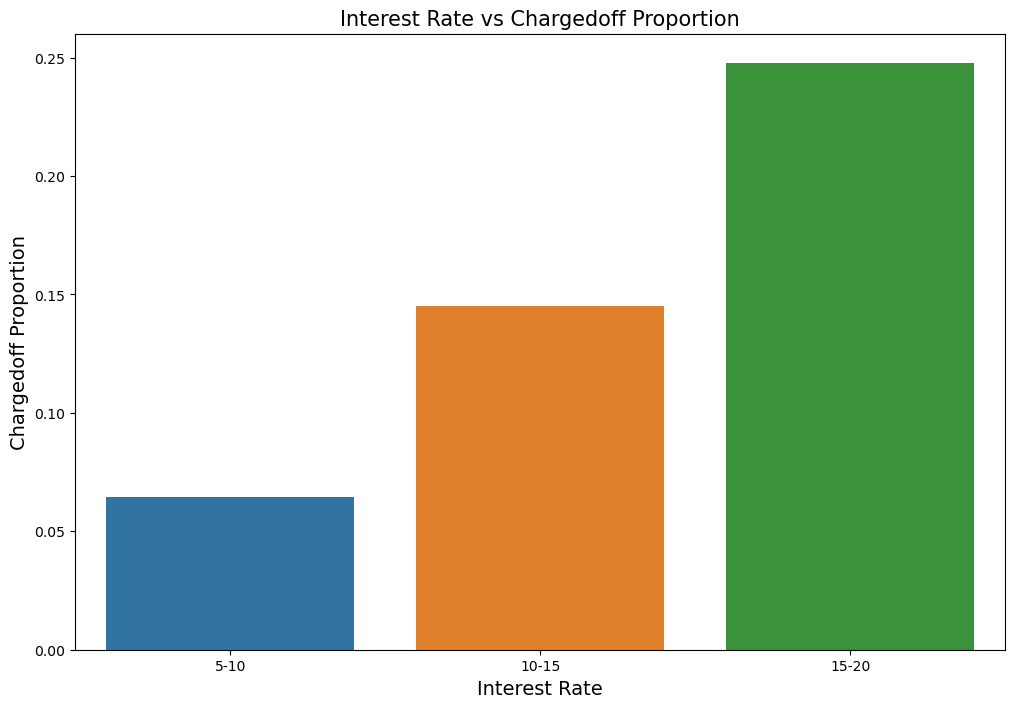

In [130]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='int_rate_bin', y='Chargedoff_Proportion', data=int_rate_bin_vs_loan_status)
ax1.set_xlabel('Interest Rate',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

##### Observations
- As interest rate are increasing, charged off proportion is also increasing.
- The borrower who takes loan at the interest rate of 15 to 20 are getting mostly charged off.

In [131]:
emp_length_vs_loan_status = df_loan.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emp_length_vs_loan_status['Total'] = emp_length_vs_loan_status['Charged Off'] + emp_length_vs_loan_status['Fully Paid'] 
emp_length_vs_loan_status['Chargedoff_Proportion'] = emp_length_vs_loan_status['Charged Off'] / emp_length_vs_loan_status['Total']
emp_length_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,10+ years,1233,6537,7770,0.158687
7,7 years,246,1371,1617,0.152134
0,1 year,422,2521,2943,0.143391
5,5 years,426,2574,3000,0.142000
8,8 years,187,1131,1318,0.141882
6,6 years,287,1754,2041,0.140617
10,< 1 year,581,3570,4151,0.139966
3,3 years,524,3236,3760,0.139362
4,4 years,423,2721,3144,0.134542
2,2 years,530,3488,4018,0.131906


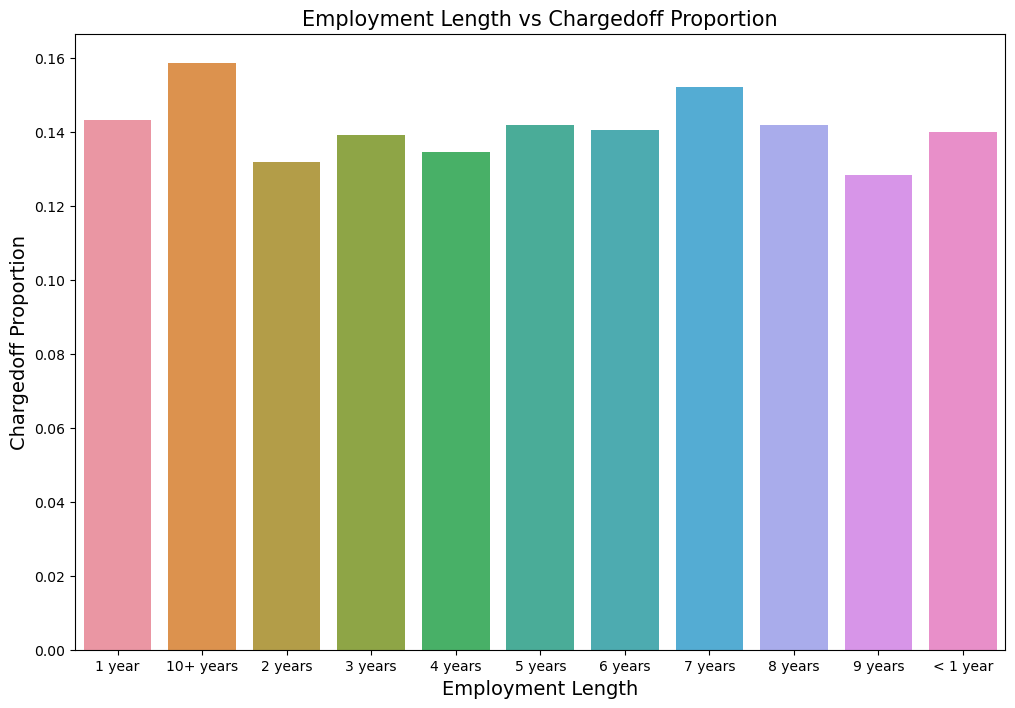

In [132]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emp_length_vs_loan_status)
ax1.set_xlabel('Employment Length',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

##### Observations
- The borrowers whose employee length is less than 1 year, 1 year and 10+ year are mostly getting charged off.

In [133]:
addr_state_vs_loan_status = df_loan.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan_status['Total'] = addr_state_vs_loan_status['Charged Off'] + addr_state_vs_loan_status['Fully Paid'] 
addr_state_vs_loan_status['Chargedoff_Proportion'] = addr_state_vs_loan_status['Charged Off'] / addr_state_vs_loan_status['Total']
addr_state_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_Proportion
31,NV,96.0,343.0,439.0,0.218679
40,TN,2.0,8.0,10.0,0.200000
0,AK,13.0,55.0,68.0,0.191176
39,SD,11.0,48.0,59.0,0.186441
11,HI,28.0,127.0,155.0,0.180645
9,FL,442.0,2074.0,2516.0,0.175676
30,NM,29.0,138.0,167.0,0.173653
35,OR,67.0,340.0,407.0,0.164619
23,MO,100.0,515.0,615.0,0.162602
29,NJ,258.0,1357.0,1615.0,0.159752


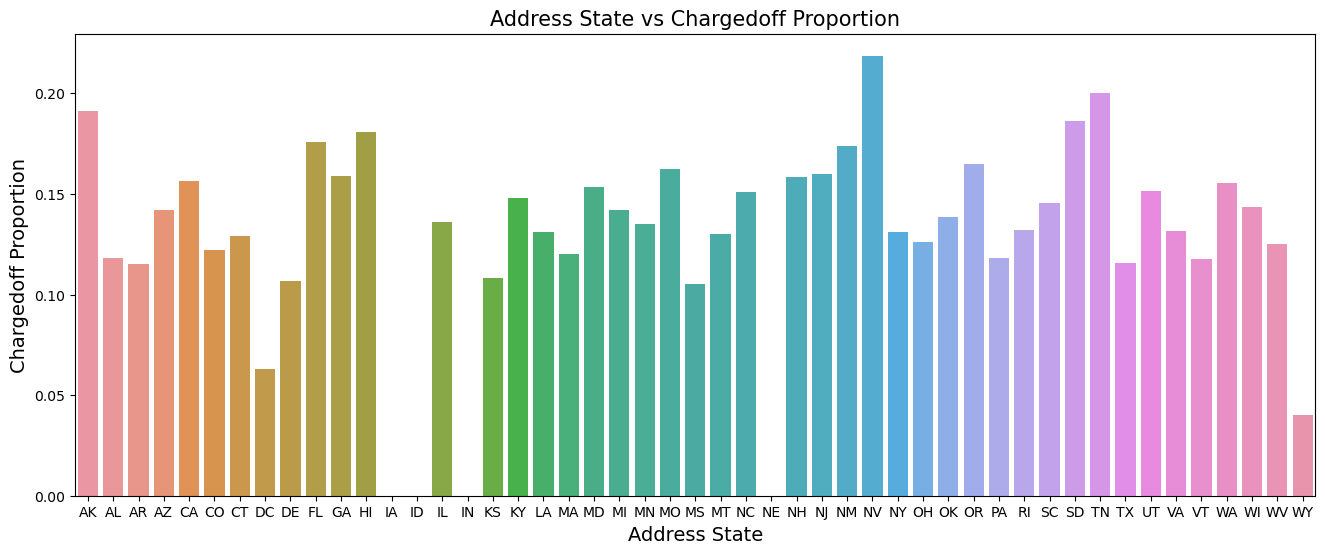

In [134]:
fig, ax1 = plt.subplots(figsize=(16, 6))
ax1.set_title('Address State vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan_status)
ax1.set_xlabel('Address State',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

##### Observations
- The borrowers who are from NV, AK, TN state are mostly getting charged off.

In [135]:
verification_status_vs_loan_status = df_loan.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verification_status_vs_loan_status['Total'] = verification_status_vs_loan_status['Charged Off'] + verification_status_vs_loan_status['Fully Paid'] 
verification_status_vs_loan_status['Chargedoff_Proportion'] = verification_status_vs_loan_status['Charged Off'] / verification_status_vs_loan_status['Total']
verification_status_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,verification_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,Verified,1832,8954,10786,0.169850
1,Source Verified,1320,7639,8959,0.147338
0,Not Verified,1853,13301,15154,0.122278


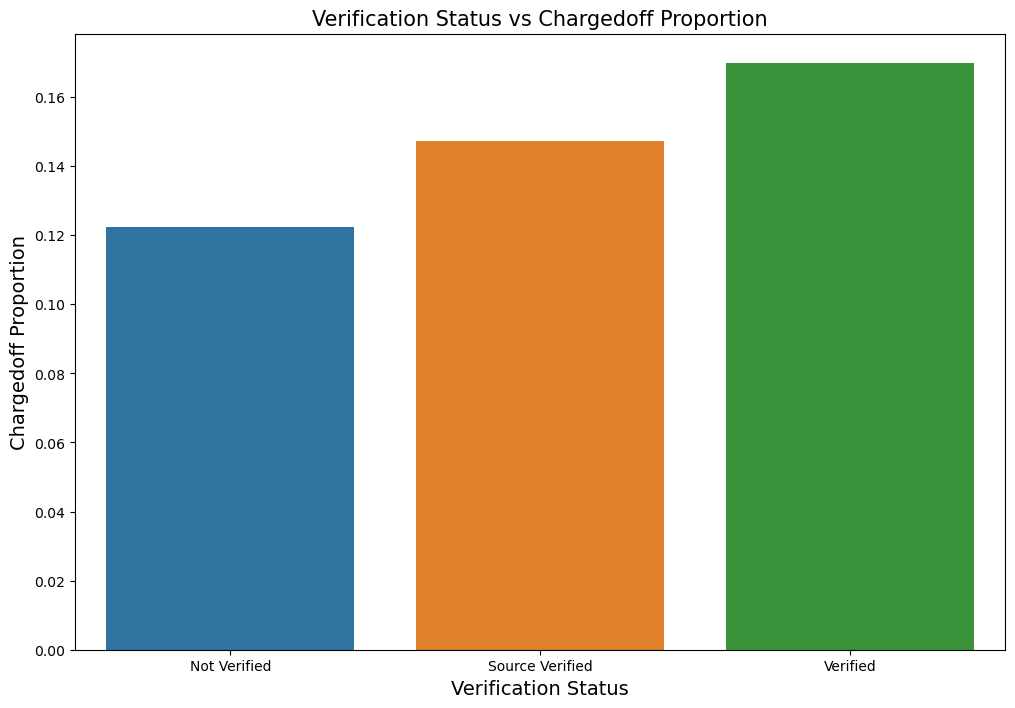

In [136]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verification_status_vs_loan_status)
ax1.set_xlabel('Verification Status',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

##### Observations
- Most of the verified borrowers are getting charged off then others.

# Multivariate Analysis

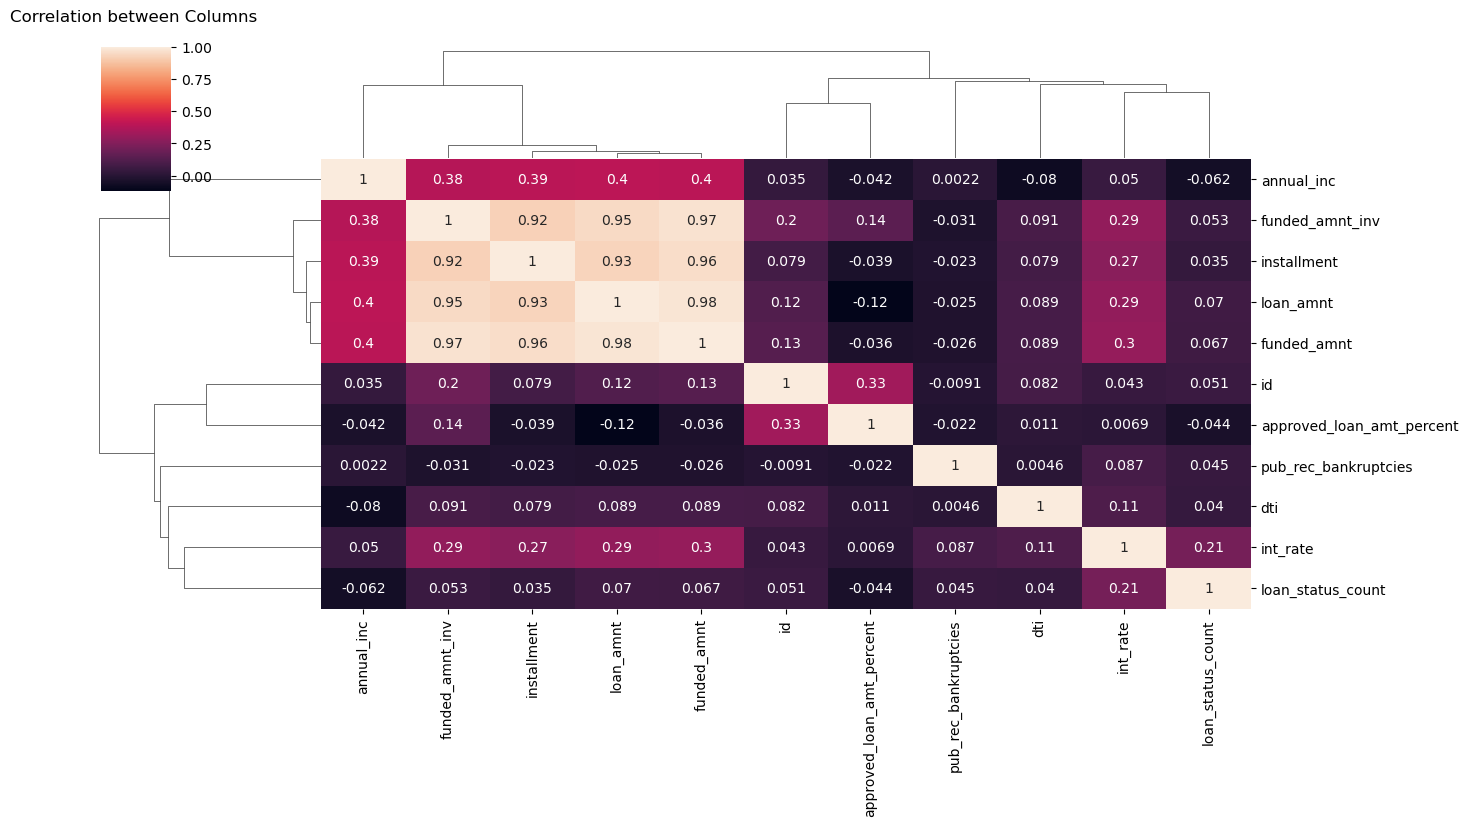

In [145]:
# Select only numeric columns for correlation calculation
numeric_columns = df_loan.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for numeric columns only
data_correlation = numeric_columns.corr()

# Plot the correlation matrix using a clustermap
sns.clustermap(data_correlation, annot=True, figsize=(14, 8))
plt.title("Correlation between Columns \n")
plt.show()

##### Observations
- <b>loan_amnt , funded_amnt , funded_amnt_inv , installment</b> are strongly correlated.
- <b>annual_inc and dti</b> is negatively correlated.
- Debt income ratio is the percentage of a borrower's monthly gross income that goes toward paying debts. 
- Which means when annual_inc is low, debt is high and vice versa.

# Recommendations

##### From above analysis we can say that, there is more probability of defaulting when
- Borrower’s are taking loan for the term ‘60 months’.
- Borrower’s whose loan status is ‘Verified’ as they taken high amount of loan with 60 months tenure.
- Borrower’s who are having home ownership as ‘Rent’ and they take loan for the purpose of debt consolidation.
- Borrower’s whose annual income is low i.e. (0-20000).
- Borrower’s who takes loan amount in the range 0 to 14000.
- Borrower’s who receive interest at the rate of 15-20%.
- Borrower who takes loan for the purpose of small business.
- Borrower’s with lower Grade i.e. F<G.
- Borrower’s whose subgrade is F5,G3,G5.